# MNIST Dataset Loading and Visualization

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import struct
import os

# Path to MNIST dataset
MNIST_PATH = "./dataset/MNIST"

In [2]:
def load_mnist_images(filename):
    """
    Load MNIST images from IDX format file.
    Returns images as numpy array of shape (num_images, 28, 28)
    """
    with open(filename, 'rb') as f:
        # Read magic number and dimensions
        magic = struct.unpack('>I', f.read(4))[0]
        num_images = struct.unpack('>I', f.read(4))[0]
        num_rows = struct.unpack('>I', f.read(4))[0]
        num_cols = struct.unpack('>I', f.read(4))[0]
        
        # Read image data
        images = np.fromfile(f, dtype=np.uint8).reshape(num_images, num_rows, num_cols)
        return images

def load_mnist_labels(filename):
    """
    Load MNIST labels from IDX format file.
    Returns labels as numpy array of shape (num_labels,)
    """
    with open(filename, 'rb') as f:
        # Read magic number and number of labels
        magic = struct.unpack('>I', f.read(4))[0]
        num_labels = struct.unpack('>I', f.read(4))[0]
        
        # Read label data
        labels = np.fromfile(f, dtype=np.uint8)
        return labels

In [3]:
# Load all MNIST data
print("Loading MNIST dataset...")

# Training data
train_images = load_mnist_images(os.path.join(MNIST_PATH, "train-images.idx3-ubyte"))
train_labels = load_mnist_labels(os.path.join(MNIST_PATH, "train-labels.idx1-ubyte"))

# Test data
test_images = load_mnist_images(os.path.join(MNIST_PATH, "t10k-images.idx3-ubyte"))
test_labels = load_mnist_labels(os.path.join(MNIST_PATH, "t10k-labels.idx1-ubyte"))

print(f"✓ Training data loaded: {train_images.shape} images, {train_labels.shape} labels")
print(f"✓ Test data loaded: {test_images.shape} images, {test_labels.shape} labels")

Loading MNIST dataset...
✓ Training data loaded: (60000, 28, 28) images, (60000,) labels
✓ Test data loaded: (10000, 28, 28) images, (10000,) labels


## Visualizing Sample Images

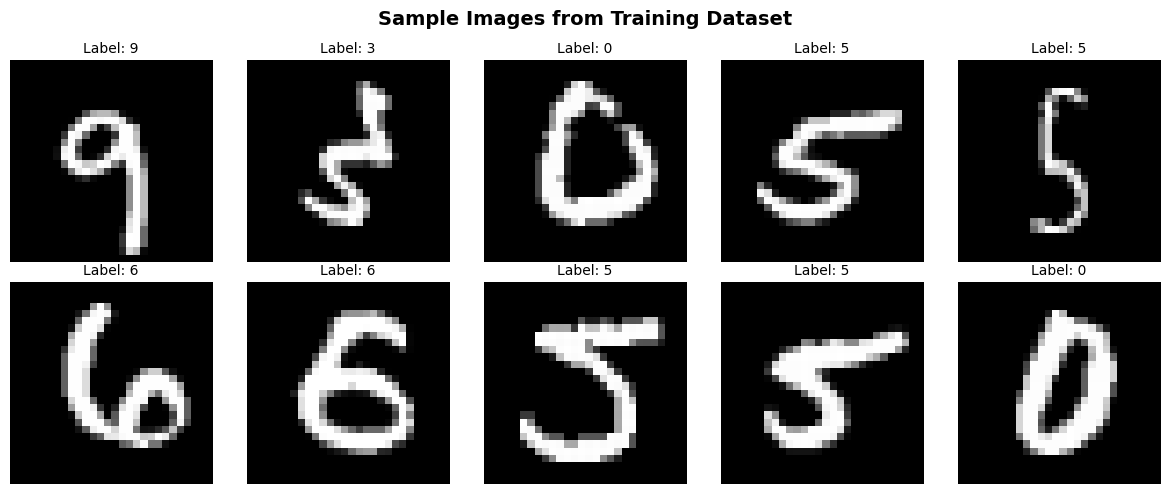

In [4]:
# Display 10 random training images
fig, axes = plt.subplots(2, 5, figsize=(12, 5))
fig.suptitle("Sample Images from Training Dataset", fontsize=14, fontweight='bold')

# Get 10 random indices
random_indices = np.random.choice(len(train_images), 10, replace=False)

for idx, ax in enumerate(axes.flat):
    img_idx = random_indices[idx]
    ax.imshow(train_images[img_idx], cmap='gray')
    ax.set_title(f"Label: {train_labels[img_idx]}", fontsize=10)
    ax.axis('off')

plt.tight_layout()
plt.show()

In [5]:
# Display statistics about the dataset
print("=" * 50)
print("MNIST DATASET STATISTICS")
print("=" * 50)

print(f"\nTraining Data:")
print(f"  - Images shape: {train_images.shape}")
print(f"  - Labels shape: {train_labels.shape}")
print(f"  - Image range: [{train_images.min()}, {train_images.max()}]")
print(f"  - Unique classes: {np.unique(train_labels)}")
print(f"  - Class distribution:")
for digit in range(10):
    count = np.sum(train_labels == digit)
    percentage = 100 * count / len(train_labels)
    print(f"    Digit {digit}: {count:6d} images ({percentage:5.1f}%)")

print(f"\nTest Data:")
print(f"  - Images shape: {test_images.shape}")
print(f"  - Labels shape: {test_labels.shape}")
print(f"  - Image range: [{test_images.min()}, {test_images.max()}]")
print(f"  - Class distribution:")
for digit in range(10):
    count = np.sum(test_labels == digit)
    percentage = 100 * count / len(test_labels)
    print(f"    Digit {digit}: {count:6d} images ({percentage:5.1f}%)")

MNIST DATASET STATISTICS

Training Data:
  - Images shape: (60000, 28, 28)
  - Labels shape: (60000,)
  - Image range: [0, 255]
  - Unique classes: [0 1 2 3 4 5 6 7 8 9]
  - Class distribution:
    Digit 0:   5923 images (  9.9%)
    Digit 1:   6742 images ( 11.2%)
    Digit 2:   5958 images (  9.9%)
    Digit 3:   6131 images ( 10.2%)
    Digit 4:   5842 images (  9.7%)
    Digit 5:   5421 images (  9.0%)
    Digit 6:   5918 images (  9.9%)
    Digit 7:   6265 images ( 10.4%)
    Digit 8:   5851 images (  9.8%)
    Digit 9:   5949 images (  9.9%)

Test Data:
  - Images shape: (10000, 28, 28)
  - Labels shape: (10000,)
  - Image range: [0, 255]
  - Class distribution:
    Digit 0:    980 images (  9.8%)
    Digit 1:   1135 images ( 11.3%)
    Digit 2:   1032 images ( 10.3%)
    Digit 3:   1010 images ( 10.1%)
    Digit 4:    982 images (  9.8%)
    Digit 5:    892 images (  8.9%)
    Digit 6:    958 images (  9.6%)
    Digit 7:   1028 images ( 10.3%)
    Digit 8:    974 images (  9.7%)

## Training MLP with scikit-learn

In [6]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import KFold, cross_validate
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import time

# Prepare data: flatten images for MLP
X_train = train_images.reshape(train_images.shape[0], -1)
X_test = test_images.reshape(test_images.shape[0], -1)
y_train = train_labels
y_test = test_labels

# Normalize pixel values to [0, 1]
X_train = X_train / 255.0
X_test = X_test / 255.0

print("Data prepared for MLP:")
print(f"  - Training data shape: {X_train.shape}")
print(f"  - Test data shape: {X_test.shape}")

Data prepared for MLP:
  - Training data shape: (60000, 784)
  - Test data shape: (10000, 784)


In [7]:
# Define and configure MLP model
mlp = MLPClassifier(
    hidden_layer_sizes=(256, 128),
    activation='relu',
    max_iter=300,
    batch_size=128,
    learning_rate_init=0.001,
    random_state=42,
    early_stopping=True,
    validation_fraction=0.1,
    n_iter_no_change=10,
    verbose=0
)

print("\nMLP Configuration:")
print(f"  - Architecture: 784 -> 256 -> 128 -> 10")
print(f"  - Hidden layers: {mlp.hidden_layer_sizes}")
print(f"  - Activation: {mlp.activation}")
print(f"  - Max iterations: {mlp.max_iter}")
print(f"  - Learning rate: {mlp.learning_rate_init}")
print(f"  - Early stopping: {mlp.early_stopping}")


MLP Configuration:
  - Architecture: 784 -> 256 -> 128 -> 10
  - Hidden layers: (256, 128)
  - Activation: relu
  - Max iterations: 300
  - Learning rate: 0.001
  - Early stopping: True


In [8]:
# Train model on training data
print("\n" + "="*70)
print("TRAINING MLP ON TRAINING DATA")
print("="*70 + "\n")

print("Training model...")
start_time = time.time()
mlp.fit(X_train, y_train)
train_time = time.time() - start_time
print(f"Training completed in {train_time:.2f} seconds\n")

# Evaluate on both train and test sets
y_pred_train = mlp.predict(X_train)
y_pred_test = mlp.predict(X_test)

print("TRAINING SET METRICS:")
train_accuracy = accuracy_score(y_train, y_pred_train)
train_precision = precision_score(y_train, y_pred_train, average='macro', zero_division=0)
train_recall = recall_score(y_train, y_pred_train, average='macro', zero_division=0)
train_f1 = f1_score(y_train, y_pred_train, average='macro', zero_division=0)

print(f"  - Accuracy:        {train_accuracy:.4f}")
print(f"  - Precision (macro): {train_precision:.4f}")
print(f"  - Recall (macro):    {train_recall:.4f}")
print(f"  - F1-Score (macro):  {train_f1:.4f}")

print("\nTEST SET METRICS:")
test_accuracy = accuracy_score(y_test, y_pred_test)
test_precision = precision_score(y_test, y_pred_test, average='macro', zero_division=0)
test_recall = recall_score(y_test, y_pred_test, average='macro', zero_division=0)
test_f1 = f1_score(y_test, y_pred_test, average='macro', zero_division=0)

print(f"  - Accuracy:        {test_accuracy:.4f}")
print(f"  - Precision (macro): {test_precision:.4f}")
print(f"  - Recall (macro):    {test_recall:.4f}")
print(f"  - F1-Score (macro):  {test_f1:.4f}")


TRAINING MLP ON TRAINING DATA

Training model...
Training completed in 165.24 seconds

Training completed in 165.24 seconds

TRAINING SET METRICS:
  - Accuracy:        0.9979
  - Precision (macro): 0.9979
  - Recall (macro):    0.9979
  - F1-Score (macro):  0.9979

TEST SET METRICS:
  - Accuracy:        0.9823
  - Precision (macro): 0.9823
  - Recall (macro):    0.9821
  - F1-Score (macro):  0.9822
TRAINING SET METRICS:
  - Accuracy:        0.9979
  - Precision (macro): 0.9979
  - Recall (macro):    0.9979
  - F1-Score (macro):  0.9979

TEST SET METRICS:
  - Accuracy:        0.9823
  - Precision (macro): 0.9823
  - Recall (macro):    0.9821
  - F1-Score (macro):  0.9822


In [9]:
# Detailed classification report on test set
print("\n" + "="*70)
print("DETAILED CLASSIFICATION REPORT (TEST SET)")
print("="*70 + "\n")
print(classification_report(y_test, y_pred_test, target_names=[str(i) for i in range(10)]))


DETAILED CLASSIFICATION REPORT (TEST SET)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.98      0.98      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.99      0.98      0.98       892
           6       0.99      0.98      0.98       958
           7       0.98      0.98      0.98      1028
           8       0.98      0.98      0.98       974
           9       0.97      0.98      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



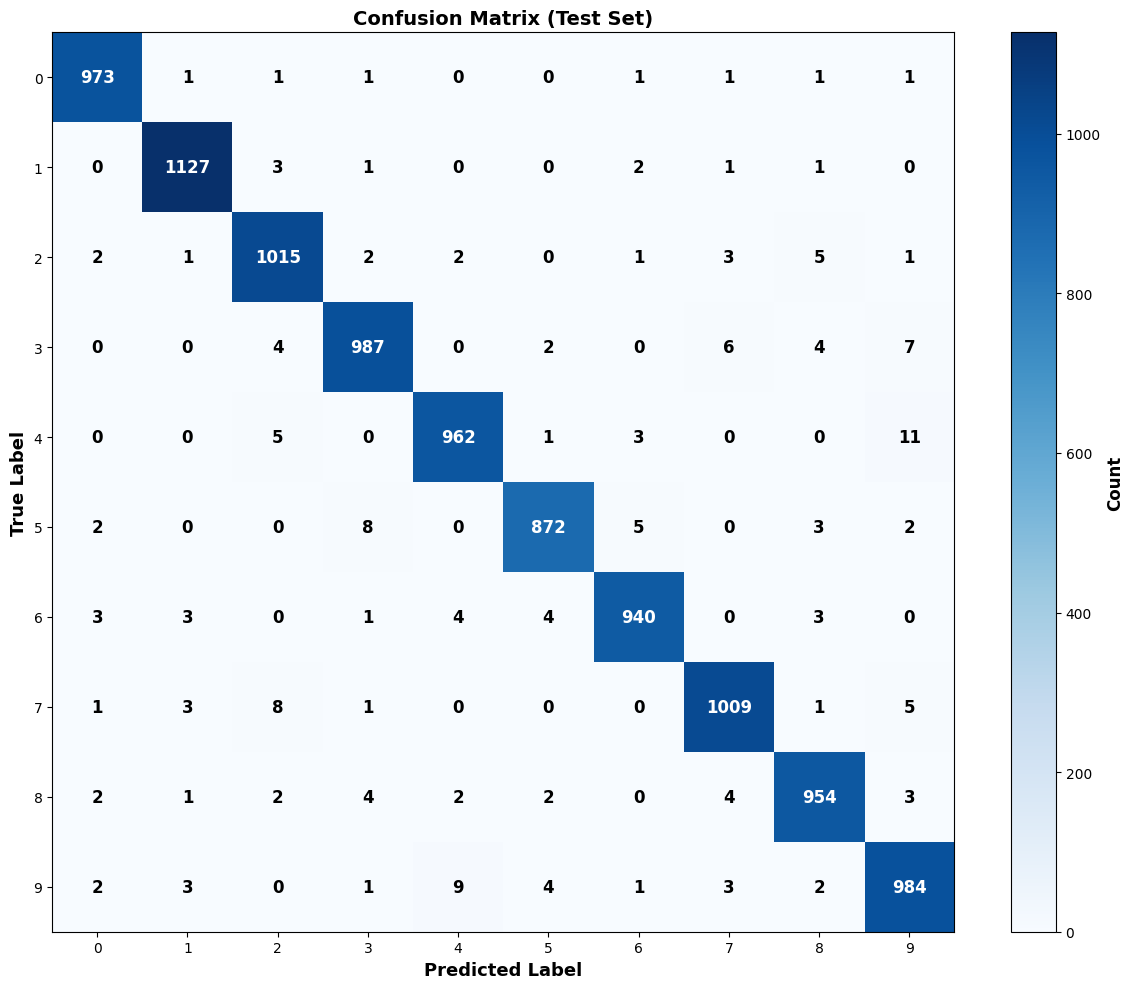

In [10]:
# Visualization of results - Confusion Matrix
fig, ax = plt.subplots(figsize=(12, 10))

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_test)

# Display confusion matrix with annotations
im = ax.imshow(cm, cmap='Blues', aspect='auto')
ax.set_xlabel('Predicted Label', fontsize=13, fontweight='bold')
ax.set_ylabel('True Label', fontsize=13, fontweight='bold')
ax.set_title('Confusion Matrix (Test Set)', fontsize=14, fontweight='bold')
ax.set_xticks(np.arange(10))
ax.set_yticks(np.arange(10))

# Add text annotations showing the counts
for i in range(10):
    for j in range(10):
        count = cm[i, j]
        text_color = 'white' if count > cm.max() / 2 else 'black'
        ax.text(j, i, str(count), ha='center', va='center', color=text_color, fontsize=12, fontweight='bold')

# Add colorbar
cbar = plt.colorbar(im, ax=ax)
cbar.set_label('Count', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

## Training Autoencoder with scikit-learn

In [11]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Define and configure Autoencoder model
# Architecture: 784 -> 256 -> 128 -> 10 -> 128 -> 256 -> 784
autoencoder = MLPRegressor(
    hidden_layer_sizes=(256, 128, 10, 128, 256),
    activation='relu',
    max_iter=300,
    batch_size=128,
    learning_rate_init=0.001,
    random_state=42,
    early_stopping=True,
    validation_fraction=0.1,
    n_iter_no_change=10,
    verbose=0
)

print("\nAutoencoder Configuration:")
print(f"  - Architecture: 784 -> 256 -> 128 -> 10 -> 128 -> 256 -> 784")
print(f"  - Hidden layers: {autoencoder.hidden_layer_sizes}")
print(f"  - Activation: {autoencoder.activation}")
print(f"  - Max iterations: {autoencoder.max_iter}")
print(f"  - Learning rate: {autoencoder.learning_rate_init}")
print(f"  - Early stopping: {autoencoder.early_stopping}")


Autoencoder Configuration:
  - Architecture: 784 -> 256 -> 128 -> 10 -> 128 -> 256 -> 784
  - Hidden layers: (256, 128, 10, 128, 256)
  - Activation: relu
  - Max iterations: 300
  - Learning rate: 0.001
  - Early stopping: True


In [12]:
# Train autoencoder on training data
print("\n" + "="*70)
print("TRAINING AUTOENCODER ON TRAINING DATA")
print("="*70 + "\n")

print("Training autoencoder...")
start_time = time.time()
autoencoder.fit(X_train, X_train)  # Input = Output (reconstruct input)
train_time = time.time() - start_time
print(f"Training completed in {train_time:.2f} seconds\n")

# Evaluate on both train and test sets
X_pred_train = autoencoder.predict(X_train)
X_pred_test = autoencoder.predict(X_test)

print("TRAINING SET METRICS:")
train_mse = mean_squared_error(X_train, X_pred_train)
train_mae = mean_absolute_error(X_train, X_pred_train)
train_rmse = np.sqrt(train_mse)

print(f"  - MSE (Mean Squared Error):   {train_mse:.6f}")
print(f"  - RMSE (Root Mean Squared Error): {train_rmse:.6f}")
print(f"  - MAE (Mean Absolute Error):  {train_mae:.6f}")

print("\nTEST SET METRICS:")
test_mse = mean_squared_error(X_test, X_pred_test)
test_mae = mean_absolute_error(X_test, X_pred_test)
test_rmse = np.sqrt(test_mse)

print(f"  - MSE (Mean Squared Error):   {test_mse:.6f}")
print(f"  - RMSE (Root Mean Squared Error): {test_rmse:.6f}")
print(f"  - MAE (Mean Absolute Error):  {test_mae:.6f}")


TRAINING AUTOENCODER ON TRAINING DATA

Training autoencoder...
Training completed in 166.30 seconds

Training completed in 166.30 seconds

TRAINING SET METRICS:
TRAINING SET METRICS:
  - MSE (Mean Squared Error):   0.023146
  - RMSE (Root Mean Squared Error): 0.152137
  - MAE (Mean Absolute Error):  0.074634

TEST SET METRICS:
  - MSE (Mean Squared Error):   0.023590
  - RMSE (Root Mean Squared Error): 0.153589
  - MAE (Mean Absolute Error):  0.075133
  - MSE (Mean Squared Error):   0.023146
  - RMSE (Root Mean Squared Error): 0.152137
  - MAE (Mean Absolute Error):  0.074634

TEST SET METRICS:
  - MSE (Mean Squared Error):   0.023590
  - RMSE (Root Mean Squared Error): 0.153589
  - MAE (Mean Absolute Error):  0.075133


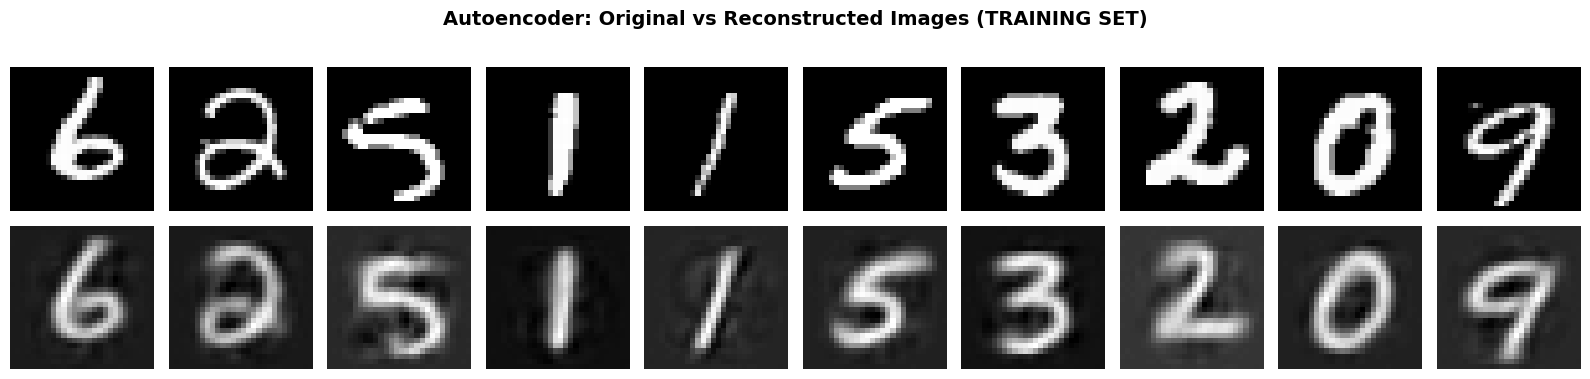


Autoencoder Reconstruction Examples (TRAINING SET):
  - Displayed 10 random examples


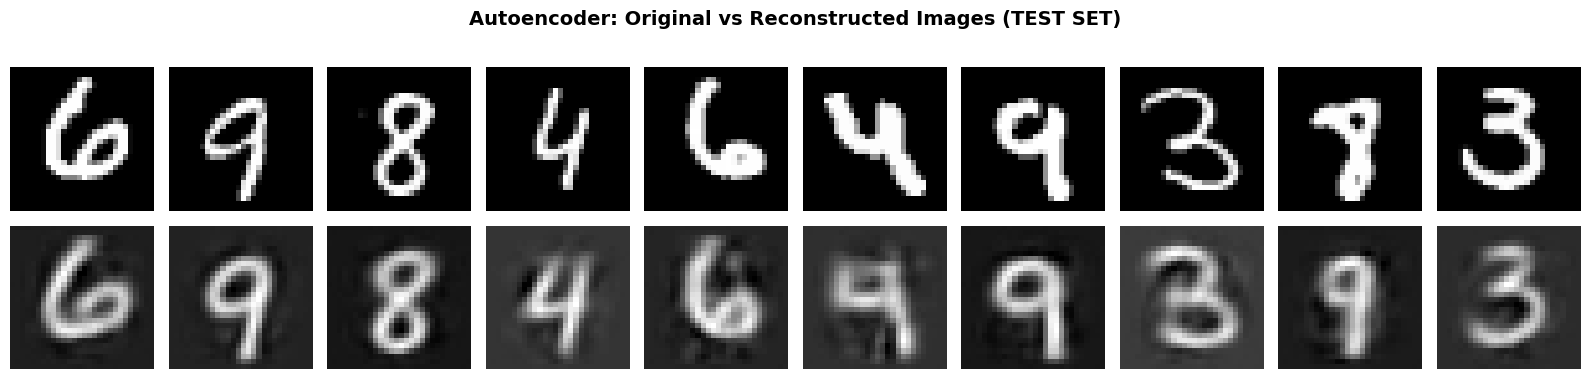


Autoencoder Reconstruction Examples (TEST SET):
  - Displayed 10 random examples


In [13]:
# Visualization of autoencoder reconstructions
# Display original vs reconstructed images from TRAINING set

fig1, axes1 = plt.subplots(2, 10, figsize=(16, 4))
fig1.suptitle('Autoencoder: Original vs Reconstructed Images (TRAINING SET)', 
             fontsize=14, fontweight='bold')

# Select 10 random images from training set
train_indices = np.random.choice(len(X_train), 10, replace=False)

# Original images
for idx, img_idx in enumerate(train_indices):
    original_img = X_train[img_idx].reshape(28, 28)
    axes1[0, idx].imshow(original_img, cmap='gray')
    axes1[0, idx].axis('off')
    if idx == 0:
        axes1[0, idx].set_ylabel('Original', fontsize=11, fontweight='bold')

# Reconstructed images
for idx, img_idx in enumerate(train_indices):
    reconstructed_img = X_pred_train[img_idx].reshape(28, 28)
    axes1[1, idx].imshow(reconstructed_img, cmap='gray')
    axes1[1, idx].axis('off')
    if idx == 0:
        axes1[1, idx].set_ylabel('Reconstructed', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.show()

print("\nAutoencoder Reconstruction Examples (TRAINING SET):")
print(f"  - Displayed {len(train_indices)} random examples")

# Visualization of autoencoder reconstructions
# Display original vs reconstructed images from TEST set

fig2, axes2 = plt.subplots(2, 10, figsize=(16, 4))
fig2.suptitle('Autoencoder: Original vs Reconstructed Images (TEST SET)', 
             fontsize=14, fontweight='bold')

# Select 10 random images from test set
test_indices = np.random.choice(len(X_test), 10, replace=False)

# Original images
for idx, img_idx in enumerate(test_indices):
    original_img = X_test[img_idx].reshape(28, 28)
    axes2[0, idx].imshow(original_img, cmap='gray')
    axes2[0, idx].axis('off')
    if idx == 0:
        axes2[0, idx].set_ylabel('Original', fontsize=11, fontweight='bold')

# Reconstructed images
for idx, img_idx in enumerate(test_indices):
    reconstructed_img = X_pred_test[img_idx].reshape(28, 28)
    axes2[1, idx].imshow(reconstructed_img, cmap='gray')
    axes2[1, idx].axis('off')
    if idx == 0:
        axes2[1, idx].set_ylabel('Reconstructed', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.show()

print("\nAutoencoder Reconstruction Examples (TEST SET):")
print(f"  - Displayed {len(test_indices)} random examples")

## Fashion MNIST Dataset Loading and Visualization

In [14]:
# Path to Fashion MNIST dataset
FASHION_MNIST_PATH = "./dataset/FASHION_MNIST"

# Load Fashion MNIST data
print("Loading Fashion MNIST dataset (light version)...")

# Load images and labels
fashion_images = load_mnist_images(os.path.join(FASHION_MNIST_PATH, "images.idx3-ubyte"))
fashion_labels = load_mnist_labels(os.path.join(FASHION_MNIST_PATH, "labels.idx1-ubyte"))

print(f"✓ Dataset loaded: {fashion_images.shape} images, {fashion_labels.shape} labels")

Loading Fashion MNIST dataset (light version)...
✓ Dataset loaded: (1000, 28, 28) images, (1000,) labels


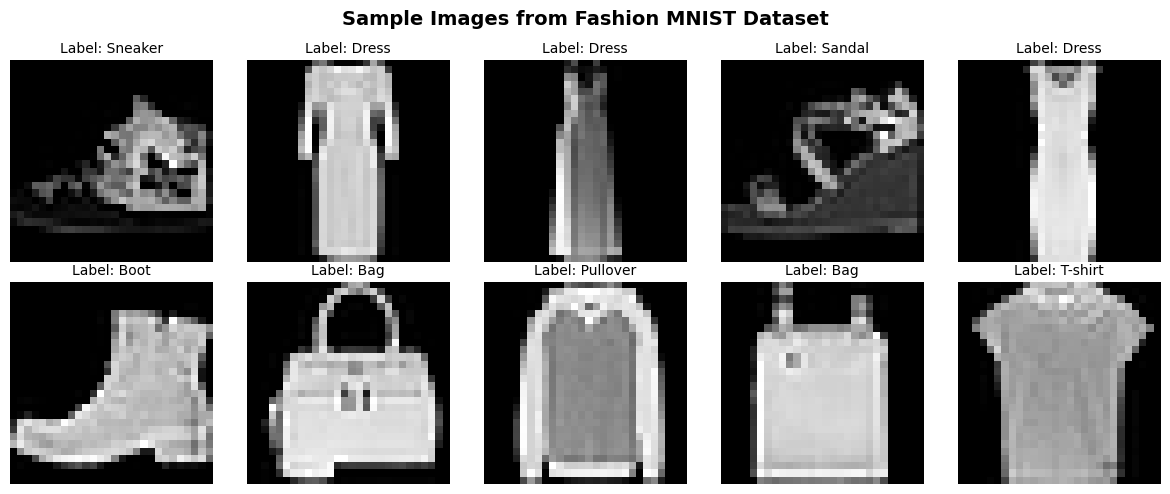

In [15]:
# Display 10 random Fashion MNIST images
fig, axes = plt.subplots(2, 5, figsize=(12, 5))
fig.suptitle("Sample Images from Fashion MNIST Dataset", fontsize=14, fontweight='bold')

# Fashion MNIST class labels
fashion_class_names = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat', 
                       'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Boot']

# Get 10 random indices
random_indices = np.random.choice(len(fashion_images), 10, replace=False)

for idx, ax in enumerate(axes.flat):
    img_idx = random_indices[idx]
    ax.imshow(fashion_images[img_idx], cmap='gray')
    ax.set_title(f"Label: {fashion_class_names[fashion_labels[img_idx]]}", fontsize=10)
    ax.axis('off')

plt.tight_layout()
plt.show()

In [16]:
# Display statistics about the Fashion MNIST dataset
print("=" * 50)
print("FASHION MNIST DATASET STATISTICS (LIGHT VERSION)")
print("=" * 50)

print(f"\nDataset Info:")
print(f"  - Images shape: {fashion_images.shape}")
print(f"  - Labels shape: {fashion_labels.shape}")
print(f"  - Image range: [{fashion_images.min()}, {fashion_images.max()}]")
print(f"  - Unique classes: {np.unique(fashion_labels)}")
print(f"  - Class distribution:")

fashion_class_names = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat', 
                       'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Boot']

for class_idx in range(10):
    count = np.sum(fashion_labels == class_idx)
    percentage = 100 * count / len(fashion_labels)
    print(f"    {fashion_class_names[class_idx]:12s}: {count:4d} images ({percentage:5.1f}%)")

FASHION MNIST DATASET STATISTICS (LIGHT VERSION)

Dataset Info:
  - Images shape: (1000, 28, 28)
  - Labels shape: (1000,)
  - Image range: [0, 255]
  - Unique classes: [0 1 2 3 4 5 6 7 8 9]
  - Class distribution:
    T-shirt     :   97 images (  9.7%)
    Trouser     :   78 images (  7.8%)
    Pullover    :  107 images ( 10.7%)
    Dress       :   97 images (  9.7%)
    Coat        :   95 images (  9.5%)
    Sandal      :  112 images ( 11.2%)
    Shirt       :   87 images (  8.7%)
    Sneaker     :  104 images ( 10.4%)
    Bag         :  117 images ( 11.7%)
    Boot        :  106 images ( 10.6%)


## Uncertainty Estimation with Deep Ensembles + Mutual Information

In [17]:
# Train K=10 MLPs with Bootstrap Deep Ensemble
from IPython.display import clear_output

print("\n" + "="*70)
print("TRAINING DEEP ENSEMBLE WITH BOOTSTRAP (K=10 MLP MODELS)")
print("="*70 + "\n")

K = 10  # Number of models in the ensemble
ensemble_models = []
bootstrap_indices_list = []  # Keep track of which samples were used for each model

print(f"Training {K} MLP models with bootstrap samples...\n")

n_samples = len(X_train)

for k in range(K):
    # Bootstrap sampling: random sample with replacement
    bootstrap_indices = np.random.choice(n_samples, size=n_samples, replace=True)
    bootstrap_indices_list.append(bootstrap_indices)
    
    # Create bootstrap dataset
    X_train_bootstrap = X_train[bootstrap_indices]
    y_train_bootstrap = y_train[bootstrap_indices]
    
    unique_samples = len(np.unique(bootstrap_indices))
    print(f"  Model {k+1}/{K}... (Unique samples: {unique_samples}/{n_samples})", end=" ", flush=True)
    
    model = MLPClassifier(
        hidden_layer_sizes=(256, 128),
        activation='relu',
        max_iter=300,
        batch_size=128,
        learning_rate_init=0.001,
        random_state=k,  # Different seed for weight initialization
        early_stopping=True,
        validation_fraction=0.1,
        n_iter_no_change=10,
        verbose=0
    )
    
    # Train on bootstrap sample
    model.fit(X_train_bootstrap, y_train_bootstrap)
    ensemble_models.append(model)
    
    train_acc = model.score(X_train, y_train)
    test_acc = model.score(X_test, y_test)
    print(f"Train Acc: {train_acc:.4f}, Test Acc: {test_acc:.4f}")

print(f"\n✓ Deep Ensemble with Bootstrap training completed!")
print(f"  - Each model trained on {n_samples} samples (with replacement)")
print(f"  - Average unique samples per bootstrap: {np.mean([len(np.unique(idx)) for idx in bootstrap_indices_list]):.0f}/{n_samples}")


TRAINING DEEP ENSEMBLE WITH BOOTSTRAP (K=10 MLP MODELS)

Training 10 MLP models with bootstrap samples...

  Model 1/10... (Unique samples: 38022/60000) Train Acc: 0.9919, Test Acc: 0.9814
  Model 2/10... (Unique samples: 37944/60000) Train Acc: 0.9919, Test Acc: 0.9814
  Model 2/10... (Unique samples: 37944/60000) Train Acc: 0.9916, Test Acc: 0.9803
  Model 3/10... (Unique samples: 38059/60000) Train Acc: 0.9916, Test Acc: 0.9803
  Model 3/10... (Unique samples: 38059/60000) Train Acc: 0.9924, Test Acc: 0.9814
  Model 4/10... (Unique samples: 37899/60000) Train Acc: 0.9924, Test Acc: 0.9814
  Model 4/10... (Unique samples: 37899/60000) Train Acc: 0.9911, Test Acc: 0.9796
  Model 5/10... (Unique samples: 38018/60000) Train Acc: 0.9911, Test Acc: 0.9796
  Model 5/10... (Unique samples: 38018/60000) Train Acc: 0.9905, Test Acc: 0.9774
  Model 6/10... (Unique samples: 37917/60000) Train Acc: 0.9905, Test Acc: 0.9774
  Model 6/10... (Unique samples: 37917/60000) Train Acc: 0.9913, Test Ac

In [18]:
import os

# Vérifie si le dossier existe
fashion_path = "./dataset/FASHION_MNIST"
print(f"Dossier existe: {os.path.exists(fashion_path)}")

# Liste les fichiers dans le dossier
if os.path.exists(fashion_path):
    files = os.listdir(fashion_path)
    print(f"\nFichiers trouvés:")
    for f in files:
        print(f"  - {f}")
else:
    print(f"Le dossier {fashion_path} n'existe pas!")

Dossier existe: True

Fichiers trouvés:
  - images.idx3-ubyte
  - labels.idx1-ubyte


In [19]:
# Function to compute uncertainty measures
def compute_uncertainties(models, X, y=None):
    """
    Compute aleatoric and epistemic uncertainties using Deep Ensemble + MI.
    
    Args:
        models: List of trained MLP classifiers
        X: Input data (flattened)
        y: True labels (optional, for accuracy computation)
    
    Returns:
        predictions: Average predictions across ensemble
        probabilities: Average probabilities across ensemble
        u_aleatoric: Aleatoric uncertainty (entropy of average probabilities)
        u_epistemic: Epistemic uncertainty (mutual information)
        accuracies: Per-sample accuracy (if y provided)
    """
    K = len(models)
    n_samples = X.shape[0]
    n_classes = 10
    
    # Get predictions and probabilities from all models
    all_probs = []
    
    for model in models:
        probs = model.predict_proba(X)
        all_probs.append(probs)
    
    all_probs = np.array(all_probs)  # Shape: (K, n_samples, n_classes)
    
    # Average probabilities across the ensemble
    prob_mean = np.mean(all_probs, axis=0)  # Shape: (n_samples, n_classes)
    
    # Predictions from average probabilities
    predictions = np.argmax(prob_mean, axis=1)
    
    # Aleatoric uncertainty: entropy of the average probabilities
    # H(p̄(x)) where p̄(x) = 1/K * Σ p_k(x)
    epsilon = 1e-10
    u_aleatoric = -np.sum(prob_mean * np.log(prob_mean + epsilon), axis=1)
    
    # Epistemic uncertainty: mutual information
    # MI = H(p̄(x)) - 1/K * Σ H(p_k(x))
    # H(p_k(x)) for each model
    individual_entropies = -np.sum(all_probs * np.log(all_probs + epsilon), axis=2)  # Shape: (K, n_samples)
    mean_individual_entropy = np.mean(individual_entropies, axis=0)  # Shape: (n_samples,)
    
    u_epistemic = u_aleatoric - mean_individual_entropy
    
    # Accuracy (if labels provided)
    accuracies = None
    if y is not None:
        accuracies = (predictions == y).astype(float)
    
    return predictions, prob_mean, u_aleatoric, u_epistemic, accuracies

print("\n✓ Uncertainty computation functions defined!")
print("  - u_aleatoric: H(p̄(x)) - entropy of average probabilities")
print("  - u_epistemic: Mutual Information = H(p̄(x)) - 1/K Σ H(p_k(x))")
print("  - OOD detection: High epistemic + Low aleatoric → anomaly")


✓ Uncertainty computation functions defined!
  - u_aleatoric: H(p̄(x)) - entropy of average probabilities
  - u_epistemic: Mutual Information = H(p̄(x)) - 1/K Σ H(p_k(x))
  - OOD detection: High epistemic + Low aleatoric → anomaly


In [20]:
# Evaluate on MNIST test set (should be well-classified with low uncertainty)
print("\n" + "="*70)
print("EVALUATION ON MNIST TEST SET")
print("="*70 + "\n")

y_pred_mnist, prob_mnist, u_alea_mnist, u_epis_mnist, acc_mnist = compute_uncertainties(
    ensemble_models, X_test, y_test
)

# Overall metrics
mnist_accuracy = np.mean(acc_mnist)
mnist_alea_mean = np.mean(u_alea_mnist)
mnist_alea_std = np.std(u_alea_mnist)
mnist_epis_mean = np.mean(u_epis_mnist)
mnist_epis_std = np.std(u_epis_mnist)

print("MNIST Test Set Results:")
print(f"  - Ensemble Accuracy: {mnist_accuracy:.4f}")
print(f"\n  Aleatoric Uncertainty (Data Uncertainty):")
print(f"    Mean: {mnist_alea_mean:.4f}, Std: {mnist_alea_std:.4f}")
print(f"    Min: {u_alea_mnist.min():.4f}, Max: {u_alea_mnist.max():.4f}")
print(f"\n  Epistemic Uncertainty (Model Uncertainty / OOD):")
print(f"    Mean: {mnist_epis_mean:.4f}, Std: {mnist_epis_std:.4f}")
print(f"    Min: {u_epis_mnist.min():.4f}, Max: {u_epis_mnist.max():.4f}")

# Correlation between accuracy and uncertainties
corr_alea_acc = np.corrcoef(u_alea_mnist, acc_mnist)[0, 1]
corr_epis_acc = np.corrcoef(u_epis_mnist, acc_mnist)[0, 1]

print(f"\n  Correlation with accuracy:")
print(f"    Aleatoric-Accuracy: {corr_alea_acc:.4f}")
print(f"    Epistemic-Accuracy: {corr_epis_acc:.4f}")


EVALUATION ON MNIST TEST SET

MNIST Test Set Results:
  - Ensemble Accuracy: 0.9851

  Aleatoric Uncertainty (Data Uncertainty):
    Mean: 0.0361, Std: 0.1467
    Min: -0.0000, Max: 1.7001

  Epistemic Uncertainty (Model Uncertainty / OOD):
    Mean: 0.0209, Std: 0.0903
    Min: -0.0000, Max: 1.0919

  Correlation with accuracy:
    Aleatoric-Accuracy: -0.5279
    Epistemic-Accuracy: -0.5157
MNIST Test Set Results:
  - Ensemble Accuracy: 0.9851

  Aleatoric Uncertainty (Data Uncertainty):
    Mean: 0.0361, Std: 0.1467
    Min: -0.0000, Max: 1.7001

  Epistemic Uncertainty (Model Uncertainty / OOD):
    Mean: 0.0209, Std: 0.0903
    Min: -0.0000, Max: 1.0919

  Correlation with accuracy:
    Aleatoric-Accuracy: -0.5279
    Epistemic-Accuracy: -0.5157


In [21]:
# Evaluate on Fashion MNIST (out-of-distribution, should have high epistemic uncertainty)
print("\n" + "="*70)
print("EVALUATION ON FASHION MNIST (OUT-OF-DISTRIBUTION TEST)")
print("="*70 + "\n")

# Prepare Fashion MNIST data
X_fashion = fashion_images.reshape(fashion_images.shape[0], -1) / 255.0

y_pred_fashion, prob_fashion, u_alea_fashion, u_epis_fashion, _ = compute_uncertainties(
    ensemble_models, X_fashion
)

fashion_alea_mean = np.mean(u_alea_fashion)
fashion_alea_std = np.std(u_alea_fashion)
fashion_epis_mean = np.mean(u_epis_fashion)
fashion_epis_std = np.std(u_epis_fashion)

print("Fashion MNIST Results (Out-of-Distribution):")
print(f"  Aleatoric Uncertainty (Data Uncertainty):")
print(f"    Mean: {fashion_alea_mean:.4f}, Std: {fashion_alea_std:.4f}")
print(f"    Min: {u_alea_fashion.min():.4f}, Max: {u_alea_fashion.max():.4f}")
print(f"\n  Epistemic Uncertainty (Model Uncertainty / OOD):")
print(f"    Mean: {fashion_epis_mean:.4f}, Std: {fashion_epis_std:.4f}")
print(f"    Min: {u_epis_fashion.min():.4f}, Max: {u_epis_fashion.max():.4f}")

print("\n" + "="*70)
print("COMPARISON: MNIST vs FASHION MNIST")
print("="*70)
print(f"\nAleatoric Uncertainty:")
print(f"  MNIST:         {mnist_alea_mean:.4f} ± {mnist_alea_std:.4f}")
print(f"  Fashion MNIST: {fashion_alea_mean:.4f} ± {fashion_alea_std:.4f}")
print(f"  Ratio (Fashion/MNIST): {fashion_alea_mean/mnist_alea_mean:.2f}x")

print(f"\nEpistemic Uncertainty:")
print(f"  MNIST:         {mnist_epis_mean:.4f} ± {mnist_epis_std:.4f}")
print(f"  Fashion MNIST: {fashion_epis_mean:.4f} ± {fashion_epis_std:.4f}")
print(f"  Ratio (Fashion/MNIST): {fashion_epis_mean/mnist_epis_mean:.2f}x")

print(f"\n→ Fashion MNIST should have HIGHER epistemic uncertainty (OOD detection)")


EVALUATION ON FASHION MNIST (OUT-OF-DISTRIBUTION TEST)

Fashion MNIST Results (Out-of-Distribution):
  Aleatoric Uncertainty (Data Uncertainty):
    Mean: 0.8587, Std: 0.5359
    Min: 0.0000, Max: 1.9299

  Epistemic Uncertainty (Model Uncertainty / OOD):
    Mean: 0.5666, Std: 0.3709
    Min: 0.0000, Max: 1.4784

COMPARISON: MNIST vs FASHION MNIST

Aleatoric Uncertainty:
  MNIST:         0.0361 ± 0.1467
  Fashion MNIST: 0.8587 ± 0.5359
  Ratio (Fashion/MNIST): 23.78x

Epistemic Uncertainty:
  MNIST:         0.0209 ± 0.0903
  Fashion MNIST: 0.5666 ± 0.3709
  Ratio (Fashion/MNIST): 27.05x

→ Fashion MNIST should have HIGHER epistemic uncertainty (OOD detection)
Fashion MNIST Results (Out-of-Distribution):
  Aleatoric Uncertainty (Data Uncertainty):
    Mean: 0.8587, Std: 0.5359
    Min: 0.0000, Max: 1.9299

  Epistemic Uncertainty (Model Uncertainty / OOD):
    Mean: 0.5666, Std: 0.3709
    Min: 0.0000, Max: 1.4784

COMPARISON: MNIST vs FASHION MNIST

Aleatoric Uncertainty:
  MNIST:   

In [22]:
# OOD Detection: Ratio-based strategy (Epistemic / Aleatoric)
print("\n" + "="*70)
print("OUT-OF-DISTRIBUTION (OOD) DETECTION")
print("="*70 + "\n")

print("Detection Strategy: Ratio (Epistemic / Aleatoric)")
print("-" * 70)

# Compute ratio: epistemic / aleatoric
epsilon = 1e-10
ratio_mnist = u_epis_mnist / (u_alea_mnist + epsilon)
ratio_fashion = u_epis_fashion / (u_alea_fashion + epsilon)

# Define threshold using 75th percentile from MNIST test set
ratio_threshold = np.percentile(ratio_mnist, 95)

print(f"\nRatio threshold (75th percentile from MNIST): {ratio_threshold:.4f}")
print(f"\nInterpretation:")
print(f"  - Ratio = u_epistemic / u_aleatoric")
print(f"  - High ratio → Model uncertainty dominates (OOD signal)")
print(f"  - Low ratio → Data uncertainty dominates (ID signal)")

# OOD detection: High epistemic/aleatoric ratio
is_ood_mnist = ratio_mnist > ratio_threshold
is_ood_fashion = ratio_fashion > ratio_threshold

ood_count_mnist = np.sum(is_ood_mnist)
ood_count_fashion = np.sum(is_ood_fashion)

print(f"\nOOD Detection Results:")
print(f"\n  MNIST Test Set (ID - should mostly NOT be detected as anomaly):")
print(f"    - OOD detected: {ood_count_mnist} / {len(is_ood_mnist)} ({100*ood_count_mnist/len(is_ood_mnist):.1f}%)")
print(f"    - ID correctly identified: {len(is_ood_mnist)-ood_count_mnist} / {len(is_ood_mnist)} ({100*(len(is_ood_mnist)-ood_count_mnist)/len(is_ood_mnist):.1f}%)")

print(f"\n  Fashion MNIST (OOD - should be detected as anomaly):")
print(f"    - OOD detected: {ood_count_fashion} / {len(is_ood_fashion)} ({100*ood_count_fashion/len(is_ood_fashion):.1f}%)")
print(f"    - Incorrectly classified as ID: {len(is_ood_fashion)-ood_count_fashion} / {len(is_ood_fashion)} ({100*(len(is_ood_fashion)-ood_count_fashion)/len(is_ood_fashion):.1f}%)")

# Metrics for MLP ensemble
fpr = (is_ood_mnist).mean()  # False Positive Rate on MNIST (incorrectly detected as OOD)
tpr = is_ood_fashion.mean()  # True Positive Rate on Fashion MNIST (correctly detected as OOD)

print(f"\n✓ FPR (MNIST): {100*fpr:.2f}%")
print(f"✓ TPR (Fashion MNIST): {100*tpr:.2f}%")
print(f"\n✓ Strategy selected: Ratio-based (Epistemic/Aleatoric)")


OUT-OF-DISTRIBUTION (OOD) DETECTION

Detection Strategy: Ratio (Epistemic / Aleatoric)
----------------------------------------------------------------------

Ratio threshold (75th percentile from MNIST): 0.4825

Interpretation:
  - Ratio = u_epistemic / u_aleatoric
  - High ratio → Model uncertainty dominates (OOD signal)
  - Low ratio → Data uncertainty dominates (ID signal)

OOD Detection Results:

  MNIST Test Set (ID - should mostly NOT be detected as anomaly):
    - OOD detected: 500 / 10000 (5.0%)
    - ID correctly identified: 9500 / 10000 (95.0%)

  Fashion MNIST (OOD - should be detected as anomaly):
    - OOD detected: 733 / 1000 (73.3%)
    - Incorrectly classified as ID: 267 / 1000 (26.7%)

✓ FPR (MNIST): 5.00%
✓ TPR (Fashion MNIST): 73.30%

✓ Strategy selected: Ratio-based (Epistemic/Aleatoric)


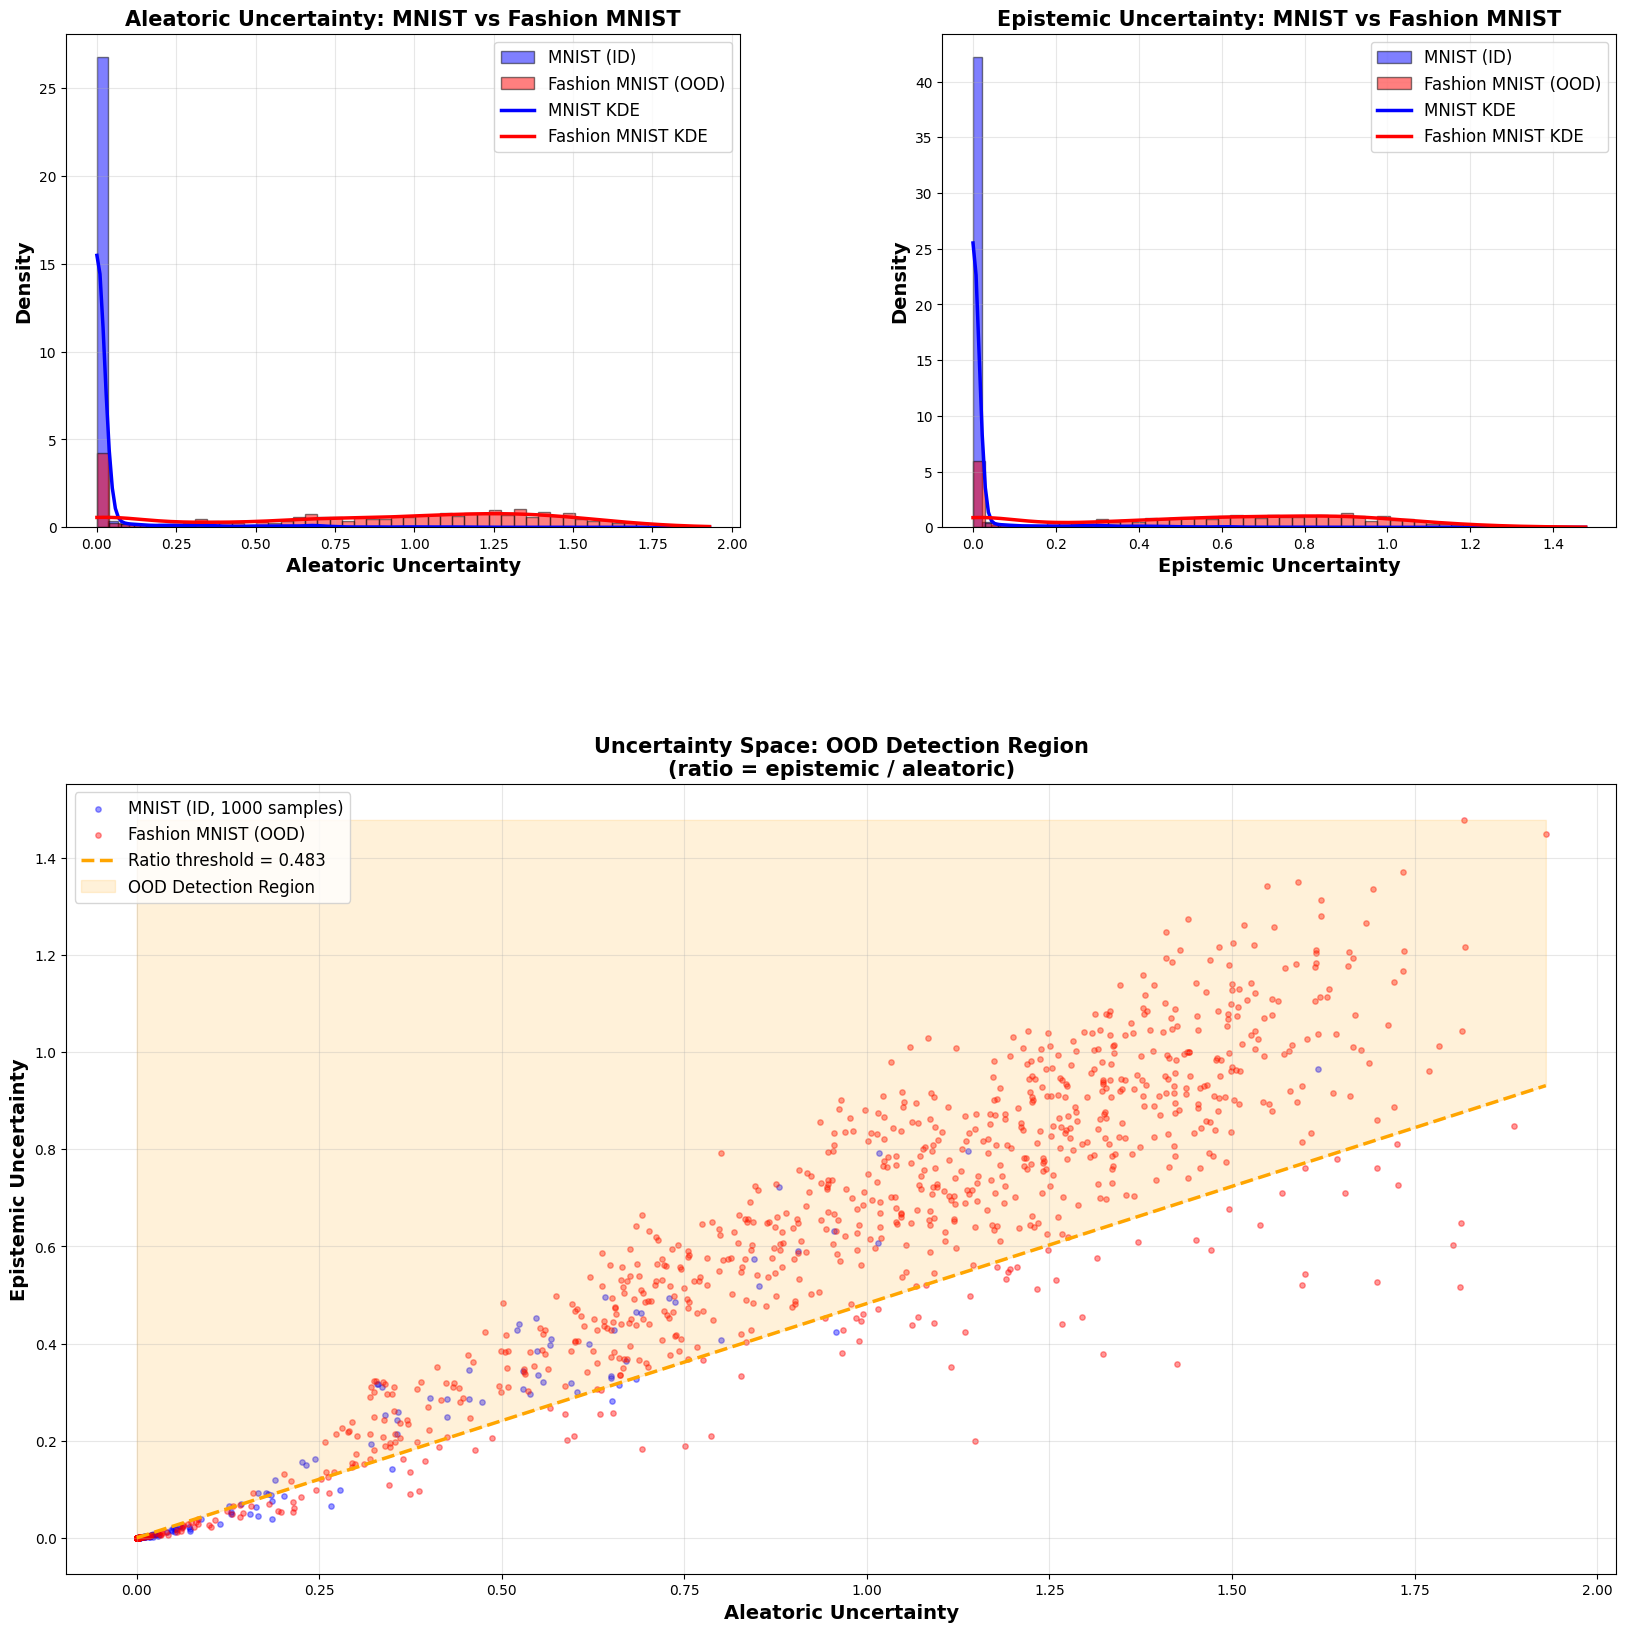


✓ Visualization: Uncertainty distributions with enlarged first two plots and sampled MNIST points


In [23]:
# Visualization: Uncertainty distributions (Density plots with normalized scales)
from scipy import stats

# Create a larger figure with 2 large subplots on top and 1 scatter on bottom
fig = plt.figure(figsize=(20, 20))
gs = fig.add_gridspec(2, 2, height_ratios=[1, 1.6], width_ratios=[1, 1], hspace=0.4, wspace=0.3)

axes = [
    fig.add_subplot(gs[0, 0]),  # Large plot 1 (top-left)
    fig.add_subplot(gs[0, 1]),  # Large plot 2 (top-right)
    fig.add_subplot(gs[1, :])   # Scatter plot (bottom, spans both columns)
]

# Plot 1: Aleatoric uncertainty (MNIST vs Fashion MNIST) - normalized - ENLARGED
axes[0].hist(u_alea_mnist, bins=50, alpha=0.5, color='blue', label='MNIST (ID)', density=True, edgecolor='black')
axes[0].hist(u_alea_fashion, bins=50, alpha=0.5, color='red', label='Fashion MNIST (OOD)', density=True, edgecolor='black')

# Add KDE (density curves)
from scipy.stats import gaussian_kde
kde_alea_mnist = gaussian_kde(u_alea_mnist)
kde_alea_fashion = gaussian_kde(u_alea_fashion)
x_alea = np.linspace(min(u_alea_mnist.min(), u_alea_fashion.min()), 
                      max(u_alea_mnist.max(), u_alea_fashion.max()), 200)
axes[0].plot(x_alea, kde_alea_mnist(x_alea), color='blue', linewidth=2.5, label='MNIST KDE')
axes[0].plot(x_alea, kde_alea_fashion(x_alea), color='red', linewidth=2.5, label='Fashion MNIST KDE')

axes[0].set_xlabel('Aleatoric Uncertainty', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Density', fontsize=14, fontweight='bold')
axes[0].set_title('Aleatoric Uncertainty: MNIST vs Fashion MNIST', fontsize=15, fontweight='bold')
axes[0].legend(fontsize=12)
axes[0].grid(alpha=0.3)

# Plot 2: Epistemic uncertainty (MNIST vs Fashion MNIST) - normalized - ENLARGED
axes[1].hist(u_epis_mnist, bins=50, alpha=0.5, color='blue', label='MNIST (ID)', density=True, edgecolor='black')
axes[1].hist(u_epis_fashion, bins=50, alpha=0.5, color='red', label='Fashion MNIST (OOD)', density=True, edgecolor='black')

# Add KDE (density curves)
kde_epis_mnist = gaussian_kde(u_epis_mnist)
kde_epis_fashion = gaussian_kde(u_epis_fashion)
x_epis = np.linspace(min(u_epis_mnist.min(), u_epis_fashion.min()), 
                      max(u_epis_mnist.max(), u_epis_fashion.max()), 200)
axes[1].plot(x_epis, kde_epis_mnist(x_epis), color='blue', linewidth=2.5, label='MNIST KDE')
axes[1].plot(x_epis, kde_epis_fashion(x_epis), color='red', linewidth=2.5, label='Fashion MNIST KDE')

axes[1].set_xlabel('Epistemic Uncertainty', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Density', fontsize=14, fontweight='bold')
axes[1].set_title('Epistemic Uncertainty: MNIST vs Fashion MNIST', fontsize=15, fontweight='bold')
axes[1].legend(fontsize=12)
axes[1].grid(alpha=0.3)

# Plot 3: 2D scatter - Aleatoric vs Epistemic with OOD detection region
# Sample 1000 random MNIST points to avoid overcrowding
n_mnist_sample = min(1000, len(u_alea_mnist))
mnist_indices = np.random.choice(len(u_alea_mnist), n_mnist_sample, replace=False)

axes[2].scatter(u_alea_mnist[mnist_indices], u_epis_mnist[mnist_indices], alpha=0.4, s=15, color='blue', label=f'MNIST (ID, {n_mnist_sample} samples)')
axes[2].scatter(u_alea_fashion, u_epis_fashion, alpha=0.4, s=15, color='red', label='Fashion MNIST (OOD)')

# Add threshold lines for ratio-based detection
# The ratio threshold creates a diagonal boundary in the uncertainty space
alea_range = np.linspace(0, max(u_alea_mnist.max(), u_alea_fashion.max()), 100)
epis_from_ratio = ratio_threshold * alea_range
epis_max = max(u_epis_mnist.max(), u_epis_fashion.max())

axes[2].plot(alea_range, epis_from_ratio, 'orange', linestyle='--', linewidth=2.5, label=f'Ratio threshold = {ratio_threshold:.3f}')
# Fill the OOD region (above the diagonal line)
axes[2].fill_between(alea_range, epis_from_ratio, epis_max, color='orange', alpha=0.15, label='OOD Detection Region')

axes[2].set_xlabel('Aleatoric Uncertainty', fontsize=14, fontweight='bold')
axes[2].set_ylabel('Epistemic Uncertainty', fontsize=14, fontweight='bold')
axes[2].set_title('Uncertainty Space: OOD Detection Region\n(ratio = epistemic / aleatoric)', fontsize=15, fontweight='bold')
axes[2].legend(fontsize=12)
axes[2].grid(alpha=0.3)

plt.show()

print("\n✓ Visualization: Uncertainty distributions with enlarged first two plots and sampled MNIST points")

In [24]:
# Additional analysis: Confidence vs Uncertainties
print("\n" + "="*70)
print("DETAILED ANALYSIS: CONFIDENCE AND UNCERTAINTIES")
print("="*70 + "\n")

# Confidence: max probability from ensemble mean
confidence_mnist = np.max(prob_mnist, axis=1)
confidence_fashion = np.max(prob_fashion, axis=1)

print("Confidence (max probability) Analysis:")
print(f"\nMNIST Test Set:")
print(f"  - Mean confidence: {np.mean(confidence_mnist):.4f}")
print(f"  - Min confidence:  {np.min(confidence_mnist):.4f}")
print(f"  - Max confidence:  {np.max(confidence_mnist):.4f}")

print(f"\nFashion MNIST:")
print(f"  - Mean confidence: {np.mean(confidence_fashion):.4f}")
print(f"  - Min confidence:  {np.min(confidence_fashion):.4f}")
print(f"  - Max confidence:  {np.max(confidence_fashion):.4f}")

print(f"\n→ Fashion MNIST has lower confidence on MNIST classes (expected for OOD)")

# Agreement analysis: How much do ensemble models agree?
print("\n" + "-"*70)
print("ENSEMBLE AGREEMENT ANALYSIS")
print("-"*70 + "\n")

# Get individual predictions from each model
individual_preds_mnist = np.array([model.predict(X_test) for model in ensemble_models])
individual_preds_fashion = np.array([model.predict(X_fashion) for model in ensemble_models])

# Agreement: proportion of models that agree with ensemble prediction
agreement_mnist = np.sum(individual_preds_mnist == y_pred_mnist.reshape(1, -1), axis=0) / K
agreement_fashion = np.sum(individual_preds_fashion == y_pred_fashion.reshape(1, -1), axis=0) / K

print("Agreement Rate (proportion of models voting for ensemble prediction):")
print(f"\nMNIST Test Set:")
print(f"  - Mean agreement: {np.mean(agreement_mnist):.4f}")
print(f"  - Min agreement:  {np.min(agreement_mnist):.4f}")
print(f"  - Max agreement:  {np.max(agreement_mnist):.4f}")
print(f"  - Samples with all {K} models agreeing: {np.sum(agreement_mnist == 1.0)} / {len(agreement_mnist)}")

print(f"\nFashion MNIST:")
print(f"  - Mean agreement: {np.mean(agreement_fashion):.4f}")
print(f"  - Min agreement:  {np.min(agreement_fashion):.4f}")
print(f"  - Max agreement:  {np.max(agreement_fashion):.4f}")
print(f"  - Samples with all {K} models agreeing: {np.sum(agreement_fashion == 1.0)} / {len(agreement_fashion)}")

# Relationship: High epistemic uncertainty should correlate with low agreement
corr_epis_agreement_mnist = np.corrcoef(u_epis_mnist, agreement_mnist)[0, 1]
corr_epis_agreement_fashion = np.corrcoef(u_epis_fashion, agreement_fashion)[0, 1]

print(f"\nCorrelation between Epistemic Uncertainty and Agreement:")
print(f"  - MNIST: {corr_epis_agreement_mnist:.4f} (should be negative)")
print(f"  - Fashion MNIST: {corr_epis_agreement_fashion:.4f} (should be negative)")


DETAILED ANALYSIS: CONFIDENCE AND UNCERTAINTIES

Confidence (max probability) Analysis:

MNIST Test Set:
  - Mean confidence: 0.9862
  - Min confidence:  0.2828
  - Max confidence:  1.0000

Fashion MNIST:
  - Mean confidence: 0.6499
  - Min confidence:  0.2522
  - Max confidence:  1.0000

→ Fashion MNIST has lower confidence on MNIST classes (expected for OOD)

----------------------------------------------------------------------
ENSEMBLE AGREEMENT ANALYSIS
----------------------------------------------------------------------

Agreement Rate (proportion of models voting for ensemble prediction):

MNIST Test Set:
  - Mean agreement: 0.9880
  - Min agreement:  0.2000
  - Max agreement:  1.0000
  - Samples with all 10 models agreeing: 9484 / 10000

Fashion MNIST:
  - Mean agreement: 0.6690
  - Min agreement:  0.2000
  - Max agreement:  1.0000
  - Samples with all 10 models agreeing: 211 / 1000

Correlation between Epistemic Uncertainty and Agreement:
  - MNIST: -0.9306 (should be negat

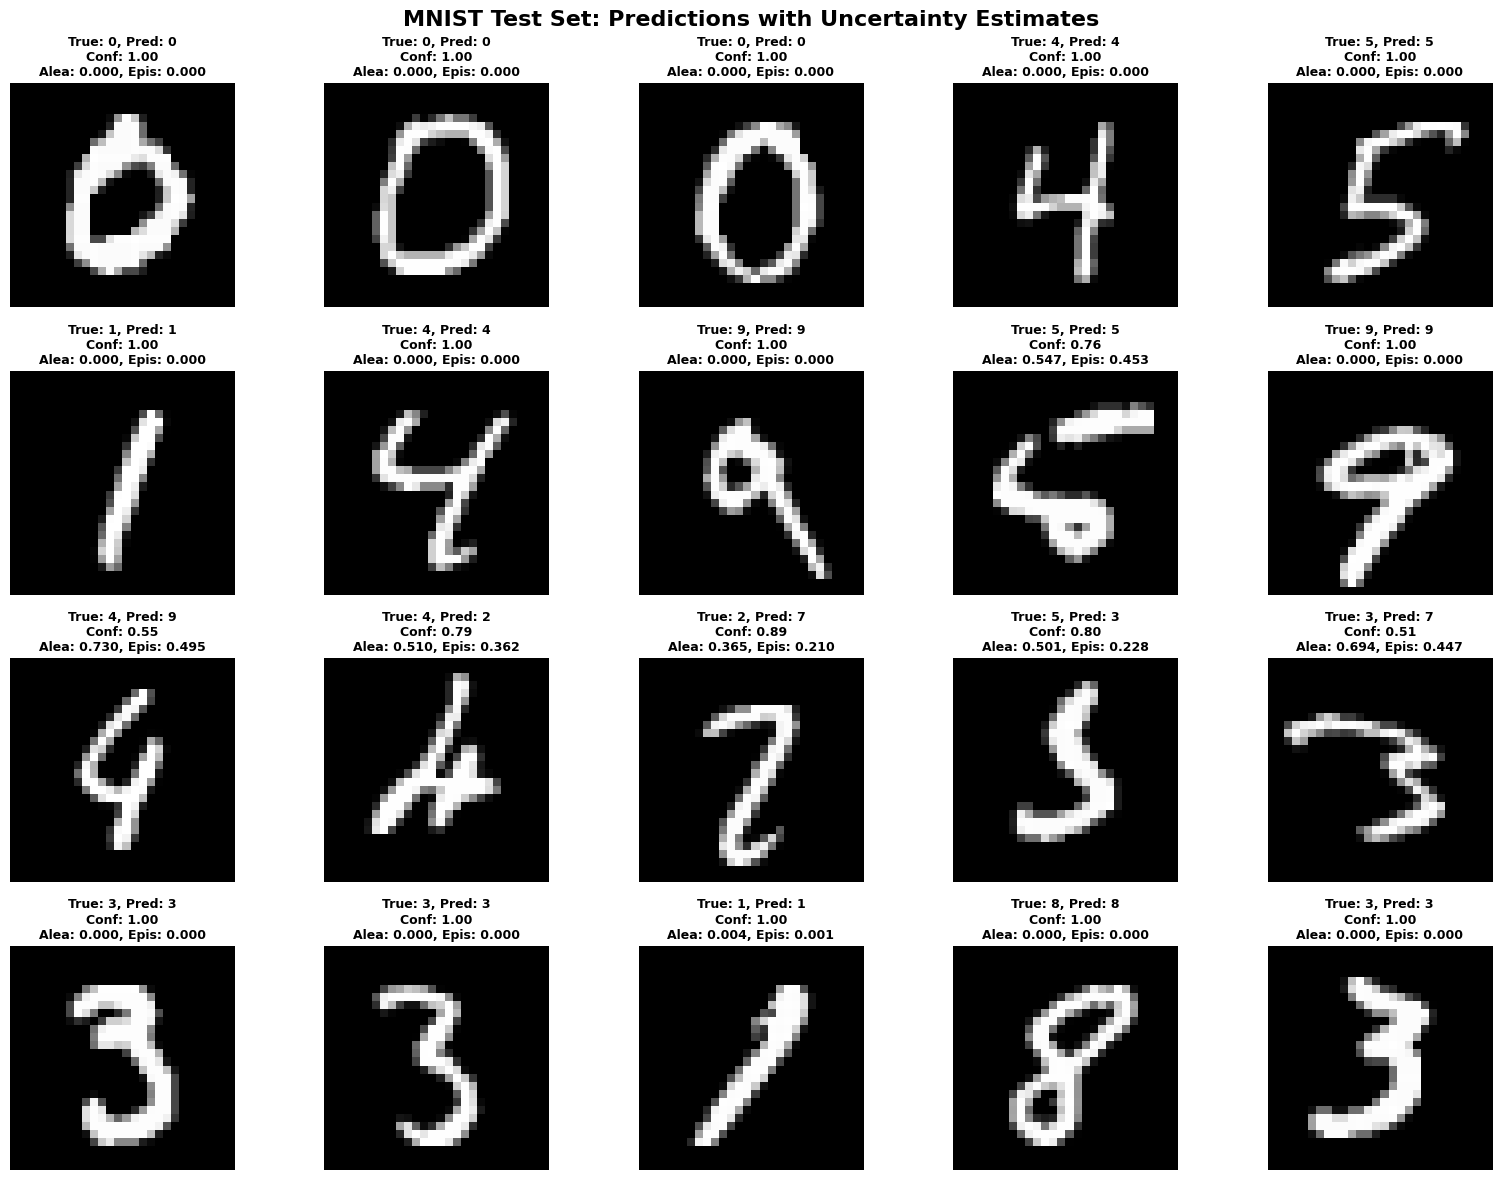


✓ Green border = Correct prediction, Red border = Incorrect
✓ Confidence, Aleatoric, and Epistemic uncertainties shown


In [25]:
# Visualization: Samples with uncertainty analysis
fig, axes = plt.subplots(4, 5, figsize=(16, 12))
fig.suptitle('MNIST Test Set: Predictions with Uncertainty Estimates', fontsize=16, fontweight='bold')

# Find diverse examples: correct with low uncertainty, correct with high uncertainty, incorrect, etc.
correct_low_epis = np.where((acc_mnist == 1) & (u_epis_mnist < np.percentile(u_epis_mnist, 33)))[0]
correct_high_epis = np.where((acc_mnist == 1) & (u_epis_mnist > np.percentile(u_epis_mnist, 67)))[0]
incorrect = np.where(acc_mnist == 0)[0]

# Select indices to display
indices_to_show = []
indices_to_show.extend(correct_low_epis[:5])
indices_to_show.extend(correct_high_epis[:5])
indices_to_show.extend(incorrect[:5])
indices_to_show.extend(np.random.choice(len(X_test), 5, replace=False))

for idx, sample_idx in enumerate(indices_to_show):
    ax = axes.flat[idx]
    
    # Display image
    img = X_test[sample_idx].reshape(28, 28)
    ax.imshow(img, cmap='gray')
    
    # Add border based on correctness
    border_color = 'green' if acc_mnist[sample_idx] == 1 else 'red'
    for spine in ax.spines.values():
        spine.set_edgecolor(border_color)
        spine.set_linewidth(3)
    
    # Title with prediction info
    title = f"True: {y_test[sample_idx]}, Pred: {y_pred_mnist[sample_idx]}\n"
    title += f"Conf: {confidence_mnist[sample_idx]:.2f}\n"
    title += f"Alea: {u_alea_mnist[sample_idx]:.3f}, Epis: {u_epis_mnist[sample_idx]:.3f}"
    
    ax.set_title(title, fontsize=9, fontweight='bold')
    ax.axis('off')

plt.tight_layout()
plt.show()

print("\n✓ Green border = Correct prediction, Red border = Incorrect")
print("✓ Confidence, Aleatoric, and Epistemic uncertainties shown")


CONFUSION MATRICES WITH OOD DETECTION (ANOMALY CLASS)



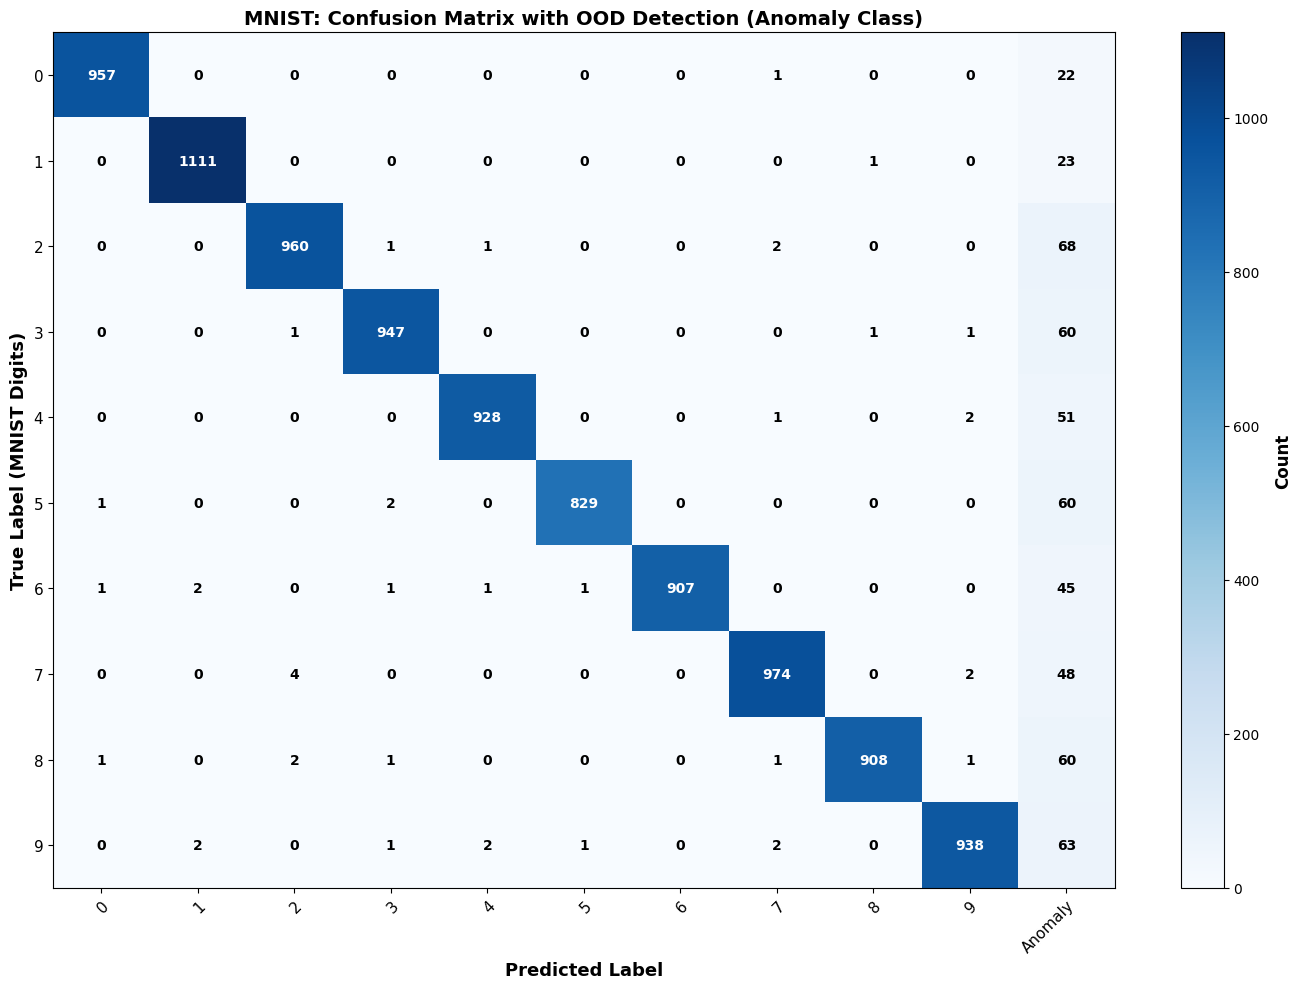

MNIST Confusion Matrix Statistics:
  - Correctly classified ID samples (diagonal): 9459
  - Falsely detected as anomaly: 500
  - OOD detected from MNIST test set: 500


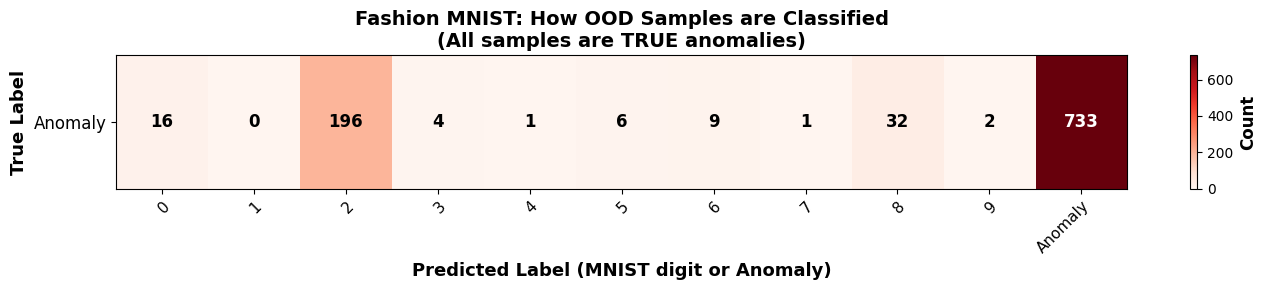


Fashion MNIST Confusion Matrix Statistics:
  - All 1000 samples are TRUE anomalies
  - Correctly detected as anomaly: 733 (73.3%)
  - Misclassified as digit 0: 16 (1.6%)
  - Misclassified as digit 2: 196 (19.6%)
  - Misclassified as digit 3: 4 (0.4%)
  - Misclassified as digit 4: 1 (0.1%)
  - Misclassified as digit 5: 6 (0.6%)
  - Misclassified as digit 6: 9 (0.9%)
  - Misclassified as digit 7: 1 (0.1%)
  - Misclassified as digit 8: 32 (3.2%)
  - Misclassified as digit 9: 2 (0.2%)

OOD DETECTION PERFORMANCE SUMMARY

MNIST Test Set (ID - should mostly NOT be detected as anomaly):
  - Correctly identified as ID: 9500 / 10000 (95.0%)
  - Falsely detected as anomaly (FPR): 500 / 10000 (5.0%)

Fashion MNIST (OOD - should be detected as anomaly):
  - Correctly detected as anomaly (TPR): 733 / 1000 (73.3%)
  - Incorrectly classified as MNIST digit (FNR): 267 / 1000 (26.7%)


In [26]:
# Confusion matrices with OOD/Anomaly detection as an additional class
print("\n" + "="*70)
print("CONFUSION MATRICES WITH OOD DETECTION (ANOMALY CLASS)")
print("="*70 + "\n")

# Create modified predictions and labels that include OOD class (label 10)
def create_predictions_with_ood(y_pred, is_ood, n_classes=10):
    """
    Replace OOD predictions with class label 10 (Anomaly class)
    """
    y_pred_with_ood = y_pred.copy()
    y_pred_with_ood[is_ood] = 10
    return y_pred_with_ood

# For MNIST: true labels stay as is (0-9), OOD predictions become 10
y_pred_mnist_ood = create_predictions_with_ood(y_pred_mnist, is_ood_mnist)

# For Fashion MNIST: all samples are anomalies (true label = 10)
y_pred_fashion_ood = create_predictions_with_ood(y_pred_fashion, is_ood_fashion)
y_true_fashion_as_anomaly = np.full_like(fashion_labels, 10)  # All are anomalies

# Compute confusion matrices
cm_mnist_ood = confusion_matrix(y_test, y_pred_mnist_ood, labels=range(11))
cm_fashion_ood = confusion_matrix(y_true_fashion_as_anomaly, y_pred_fashion_ood, labels=range(11))

# Class names including anomaly
class_names_with_anomaly = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'Anomaly']

# Visualization: MNIST Confusion Matrix with OOD
# Extract only rows 0-9 (digits) - columns 0-10 (digits + anomaly prediction)
fig, ax = plt.subplots(figsize=(14, 10))

cm_mnist_ood_digits_only = cm_mnist_ood[0:10, :]  # Extract only rows 0-9 (10 x 11 matrix)

im = ax.imshow(cm_mnist_ood_digits_only, cmap='Blues', aspect='auto')
ax.set_xlabel('Predicted Label', fontsize=13, fontweight='bold')
ax.set_ylabel('True Label (MNIST Digits)', fontsize=13, fontweight='bold')
ax.set_title('MNIST: Confusion Matrix with OOD Detection (Anomaly Class)', fontsize=14, fontweight='bold')
ax.set_xticks(np.arange(11))
ax.set_yticks(np.arange(10))
ax.set_xticklabels(class_names_with_anomaly, fontsize=11)
ax.set_yticklabels(class_names_with_anomaly[0:10], fontsize=11)

# Rotate x labels for readability
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

# Add text annotations
for i in range(10):
    for j in range(11):
        count = cm_mnist_ood_digits_only[i, j]
        text_color = 'white' if count > cm_mnist_ood_digits_only.max() / 2 else 'black'
        ax.text(j, i, str(count), ha='center', va='center', color=text_color, fontsize=10, fontweight='bold')

cbar = plt.colorbar(im, ax=ax)
cbar.set_label('Count', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

# Print statistics for MNIST
print("MNIST Confusion Matrix Statistics:")
print(f"  - Correctly classified ID samples (diagonal): {cm_mnist_ood[np.arange(10), np.arange(10)].sum()}")
print(f"  - Falsely detected as anomaly: {cm_mnist_ood[np.arange(10), 10].sum()}")
print(f"  - OOD detected from MNIST test set: {is_ood_mnist.sum()}")

# Visualization: Fashion MNIST Confusion Matrix with OOD
# Note: All Fashion MNIST samples are TRUE anomalies (label 10)
# Only extract row 10 (anomaly row) - should be 1 x 11 matrix
fig, ax = plt.subplots(figsize=(14, 3))

cm_fashion_ood_anomaly_only = cm_fashion_ood[10:11, :]  # Extract only row 10 (1 x 11 matrix)

im = ax.imshow(cm_fashion_ood_anomaly_only, cmap='Reds', aspect='auto')
ax.set_xlabel('Predicted Label (MNIST digit or Anomaly)', fontsize=13, fontweight='bold')
ax.set_ylabel('True Label', fontsize=13, fontweight='bold')
ax.set_title('Fashion MNIST: How OOD Samples are Classified\n(All samples are TRUE anomalies)', fontsize=14, fontweight='bold')
ax.set_xticks(np.arange(11))
ax.set_yticks([0])
ax.set_xticklabels(class_names_with_anomaly, fontsize=11)
ax.set_yticklabels(['Anomaly'], fontsize=12)

# Rotate x labels for readability
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

# Add text annotations
for j in range(11):
    count = cm_fashion_ood_anomaly_only[0, j]
    text_color = 'white' if count > cm_fashion_ood_anomaly_only.max() / 2 else 'black'
    ax.text(j, 0, str(count), ha='center', va='center', color=text_color, fontsize=12, fontweight='bold')

cbar = plt.colorbar(im, ax=ax)
cbar.set_label('Count', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

# Print statistics for Fashion MNIST
print("\nFashion MNIST Confusion Matrix Statistics:")
print(f"  - All {len(fashion_labels)} samples are TRUE anomalies")
print(f"  - Correctly detected as anomaly: {cm_fashion_ood[10, 10]} ({100*cm_fashion_ood[10, 10]/len(fashion_labels):.1f}%)")
for digit in range(10):
    count = cm_fashion_ood[10, digit]
    if count > 0:
        print(f"  - Misclassified as digit {digit}: {count} ({100*count/len(fashion_labels):.1f}%)")

# Summary metrics
print("\n" + "="*70)
print("OOD DETECTION PERFORMANCE SUMMARY")
print("="*70)
print(f"\nMNIST Test Set (ID - should mostly NOT be detected as anomaly):")
print(f"  - Correctly identified as ID: {(~is_ood_mnist).sum()} / {len(is_ood_mnist)} ({100*(~is_ood_mnist).sum()/len(is_ood_mnist):.1f}%)")
print(f"  - Falsely detected as anomaly (FPR): {is_ood_mnist.sum()} / {len(is_ood_mnist)} ({100*is_ood_mnist.sum()/len(is_ood_mnist):.1f}%)")

print(f"\nFashion MNIST (OOD - should be detected as anomaly):")
print(f"  - Correctly detected as anomaly (TPR): {is_ood_fashion.sum()} / {len(is_ood_fashion)} ({100*is_ood_fashion.sum()/len(is_ood_fashion):.1f}%)")
print(f"  - Incorrectly classified as MNIST digit (FNR): {(~is_ood_fashion).sum()} / {len(is_ood_fashion)} ({100*(~is_ood_fashion).sum()/len(is_ood_fashion):.1f}%)")

## Deep Ensemble Autoencoders with Uncertainty Estimation (scikit-learn)

In [27]:
# Training Deep Ensemble of Autoencoders (K=10) with Bootstrap Sampling
# Using sklearn MLPRegressor (same as single autoencoder training)

print("\n" + "="*70)
print("TRAINING DEEP ENSEMBLE OF AUTOENCODERS WITH BOOTSTRAP (K=10)")
print("="*70 + "\n")

K = 10
ensemble_ae = []

print(f"Training {K} autoencoders with bootstrap samples...\n")

n_samples = len(X_train)

for k in range(K):
    # Bootstrap sampling: random sample with replacement
    bootstrap_indices = np.random.choice(n_samples, size=n_samples, replace=True)
    
    # Create bootstrap dataset
    X_train_bootstrap = X_train[bootstrap_indices]
    n_unique = len(np.unique(bootstrap_indices))
    
    print(f"  Autoencoder {k+1}/{K}... (Unique samples: {n_unique}/{n_samples})", end=" ", flush=True)
    
    # Build and train autoencoder
    # Architecture: 784 -> 256 -> 128 -> 10 -> 128 -> 256 -> 784
    ae = MLPRegressor(
        hidden_layer_sizes=(256, 128, 10, 128, 256),
        activation='relu',
        max_iter=300,
        batch_size=128,
        learning_rate_init=0.001,
        random_state=k,  # Different seed for weight initialization
        early_stopping=True,
        validation_fraction=0.1,
        n_iter_no_change=10,
        verbose=0
    )
    
    # Train on bootstrap sample (input = output for reconstruction)
    ae.fit(X_train_bootstrap, X_train_bootstrap)
    ensemble_ae.append(ae)
    
    # Evaluate on original training set
    X_pred_train = ae.predict(X_train)
    train_mse = np.mean((X_train - X_pred_train) ** 2)
    
    print(f"Train MSE: {train_mse:.6f}")

print(f"\n✓ Deep Ensemble of Autoencoders training completed!")
print(f"  - {K} models trained with bootstrap samples")
print(f"  - Average unique samples per bootstrap: {np.mean([len(np.unique(np.random.choice(n_samples, n_samples, replace=True))) for _ in range(K)]):.0f}/{n_samples}")



TRAINING DEEP ENSEMBLE OF AUTOENCODERS WITH BOOTSTRAP (K=10)

Training 10 autoencoders with bootstrap samples...

  Autoencoder 1/10... (Unique samples: 37996/60000) Train MSE: 0.021379
  Autoencoder 2/10... (Unique samples: 37848/60000) Train MSE: 0.021379
  Autoencoder 2/10... (Unique samples: 37848/60000) Train MSE: 0.019515
  Autoencoder 3/10... (Unique samples: 37875/60000) Train MSE: 0.019515
  Autoencoder 3/10... (Unique samples: 37875/60000) Train MSE: 0.021642
  Autoencoder 4/10... (Unique samples: 37816/60000) Train MSE: 0.021642
  Autoencoder 4/10... (Unique samples: 37816/60000) Train MSE: 0.021820
  Autoencoder 5/10... (Unique samples: 37939/60000) Train MSE: 0.021820
  Autoencoder 5/10... (Unique samples: 37939/60000) Train MSE: 0.023395
  Autoencoder 6/10... (Unique samples: 38062/60000) Train MSE: 0.023395
  Autoencoder 6/10... (Unique samples: 38062/60000) Train MSE: 0.019646
  Autoencoder 7/10... (Unique samples: 37910/60000) Train MSE: 0.019646
  Autoencoder 7/10...

In [28]:
# Extract bottleneck layer outputs and compute uncertainty
def extract_bottleneck_predictions_sklearn(X, ensemble_ae, bottleneck_layer_index=2):
    """
    Extract bottleneck layer outputs from sklearn MLPRegressor autoencoders
    and convert to probabilities.
    
    Args:
        X: input data (n_samples, 784)
        ensemble_ae: list of trained MLPRegressor models
        bottleneck_layer_index: which layer is the bottleneck (index in coefs_)
                               For 784->256->128->10->128->256->784, bottleneck is layer 2 (0-indexed)
    
    Returns:
        bottleneck_outputs: (n_samples, K, 10) ensemble bottleneck predictions
    """
    n_samples = X.shape[0]
    K = len(ensemble_ae)
    bottleneck_dim = 10  # Bottleneck layer size
    
    bottleneck_outputs = np.zeros((n_samples, K, bottleneck_dim))
    
    for k, ae in enumerate(ensemble_ae):
        # Manual forward pass to bottleneck layer
        # Layer 0: input (784) -> hidden1 (256)
        z1 = X @ ae.coefs_[0] + ae.intercepts_[0]
        h1 = np.maximum(z1, 0)  # ReLU activation
        
        # Layer 1: hidden1 (256) -> hidden2 (128)
        z2 = h1 @ ae.coefs_[1] + ae.intercepts_[1]
        h2 = np.maximum(z2, 0)  # ReLU activation
        
        # Layer 2: hidden2 (128) -> bottleneck (10)
        z3 = h2 @ ae.coefs_[2] + ae.intercepts_[2]
        bottleneck = np.maximum(z3, 0)  # ReLU activation
        
        # Convert to probabilities using softmax
        exp_bottleneck = np.exp(bottleneck - bottleneck.max(axis=1, keepdims=True))
        bottleneck_probs = exp_bottleneck / exp_bottleneck.sum(axis=1, keepdims=True)
        
        bottleneck_outputs[:, k, :] = bottleneck_probs
    
    return bottleneck_outputs

print("✓ Bottleneck extraction function defined (sklearn MLPRegressor)")


✓ Bottleneck extraction function defined (sklearn MLPRegressor)


In [29]:
# Compute bottleneck predictions and uncertainty for all datasets
print("\n" + "="*70)
print("COMPUTING UNCERTAINTY FROM AUTOENCODER ENSEMBLE")
print("="*70 + "\n")

print("Computing bottleneck outputs...")
bottleneck_ae_mnist = extract_bottleneck_predictions_sklearn(X_test, ensemble_ae)
bottleneck_ae_fashion = extract_bottleneck_predictions_sklearn(X_fashion, ensemble_ae)
print(f"✓ Bottleneck outputs extracted:")
print(f"  - MNIST test set: {bottleneck_ae_mnist.shape}")
print(f"  - Fashion MNIST: {bottleneck_ae_fashion.shape}")

# Compute mean probabilities across ensemble
p_bar_ae_mnist = bottleneck_ae_mnist.mean(axis=1)  # (n_samples, 10)
p_bar_ae_fashion = bottleneck_ae_fashion.mean(axis=1)

# Function to compute entropy
def compute_entropy(p):
    """Compute entropy H(p) = -sum(p * log(p))"""
    return -np.sum(p * np.log(p + 1e-10), axis=1)

# Aleatoric uncertainty: H(p̄(x))
u_alea_ae_mnist = compute_entropy(p_bar_ae_mnist)
u_alea_ae_fashion = compute_entropy(p_bar_ae_fashion)

# Epistemic uncertainty: MI = H(p̄(x)) - (1/K) * sum_k H(p_k(x))
H_bar_ae_mnist = compute_entropy(p_bar_ae_mnist)
H_bar_ae_fashion = compute_entropy(p_bar_ae_fashion)

H_k_ae_mnist = np.array([compute_entropy(bottleneck_ae_mnist[:, k, :]) for k in range(K)])
H_k_ae_fashion = np.array([compute_entropy(bottleneck_ae_fashion[:, k, :]) for k in range(K)])

u_epis_ae_mnist = H_bar_ae_mnist - H_k_ae_mnist.mean(axis=0)
u_epis_ae_fashion = H_bar_ae_fashion - H_k_ae_fashion.mean(axis=0)

print("\n✓ Uncertainty Metrics:")
print(f"\n  MNIST (IN-DISTRIBUTION):")
print(f"    Aleatoric : µ={u_alea_ae_mnist.mean():.4f}, σ={u_alea_ae_mnist.std():.4f}")
print(f"    Epistemic : µ={u_epis_ae_mnist.mean():.4f}, σ={u_epis_ae_mnist.std():.4f}")

print(f"\n  Fashion MNIST (OUT-OF-DISTRIBUTION):")
print(f"    Aleatoric : µ={u_alea_ae_fashion.mean():.4f}, σ={u_alea_ae_fashion.std():.4f}")
print(f"    Epistemic : µ={u_epis_ae_fashion.mean():.4f}, σ={u_epis_ae_fashion.std():.4f}")

print(f"\n→ Expected: Fashion MNIST has HIGHER epistemic uncertainty (OOD detection)")



COMPUTING UNCERTAINTY FROM AUTOENCODER ENSEMBLE

Computing bottleneck outputs...
✓ Bottleneck outputs extracted:
  - MNIST test set: (10000, 10, 10)
  - Fashion MNIST: (1000, 10, 10)

✓ Uncertainty Metrics:

  MNIST (IN-DISTRIBUTION):
    Aleatoric : µ=2.1073, σ=0.0968
    Epistemic : µ=1.2041, σ=0.1927

  Fashion MNIST (OUT-OF-DISTRIBUTION):
    Aleatoric : µ=2.2031, σ=0.0550
    Epistemic : µ=1.0114, σ=0.2833

→ Expected: Fashion MNIST has HIGHER epistemic uncertainty (OOD detection)
✓ Bottleneck outputs extracted:
  - MNIST test set: (10000, 10, 10)
  - Fashion MNIST: (1000, 10, 10)

✓ Uncertainty Metrics:

  MNIST (IN-DISTRIBUTION):
    Aleatoric : µ=2.1073, σ=0.0968
    Epistemic : µ=1.2041, σ=0.1927

  Fashion MNIST (OUT-OF-DISTRIBUTION):
    Aleatoric : µ=2.2031, σ=0.0550
    Epistemic : µ=1.0114, σ=0.2833

→ Expected: Fashion MNIST has HIGHER epistemic uncertainty (OOD detection)


In [30]:
# OOD Detection with Autoencoders: Ratio-based Strategy
print("\n" + "="*70)
print("OUT-OF-DISTRIBUTION DETECTION (AUTOENCODERS)")
print("="*70 + "\n")

# Compute ratio: epistemic / aleatoric
ratio_ae_mnist = u_epis_ae_mnist / (u_alea_ae_mnist + 1e-10)
ratio_ae_fashion = u_epis_ae_fashion / (u_alea_ae_fashion + 1e-10)

# 75th percentile threshold on MNIST
ratio_ae_threshold = np.percentile(ratio_ae_mnist, 75)

# OOD detection
is_ood_ae_mnist = (ratio_ae_mnist > ratio_ae_threshold).astype(int)
is_ood_ae_fashion = (ratio_ae_fashion > ratio_ae_threshold).astype(int)

print(f"Detection Strategy: Ratio (Epistemic / Aleatoric)")
print(f"Threshold (75th percentile of MNIST): {ratio_ae_threshold:.4f}\n")

print(f"MNIST (IN-DISTRIBUTION):")
print(f"  - OOD detected: {is_ood_ae_mnist.sum()} / {len(X_test)} ({100*is_ood_ae_mnist.mean():.2f}%)")
print(f"  - ID correctly identified: {(1-is_ood_ae_mnist).sum()} / {len(X_test)} ({100*(1-is_ood_ae_mnist).mean():.2f}%)")

print(f"\nFashion MNIST (OUT-OF-DISTRIBUTION):")
print(f"  - OOD detected: {is_ood_ae_fashion.sum()} / {len(X_fashion)} ({100*is_ood_ae_fashion.mean():.2f}%)")
print(f"  - Incorrectly classified as ID: {(1-is_ood_ae_fashion).sum()} / {len(X_fashion)} ({100*(1-is_ood_ae_fashion).mean():.2f}%)")

# Metrics
fpr_ae = (1 - is_ood_ae_mnist).mean()  # False Positive Rate
tpr_ae = is_ood_ae_fashion.mean()       # True Positive Rate

print(f"\n✓ FPR (MNIST): {100*fpr_ae:.2f}%")
print(f"✓ TPR (Fashion MNIST): {100*tpr_ae:.2f}%")

# Comparison with MLP ensemble
print(f"\n" + "="*70)
print(f"COMPARISON: MLP ENSEMBLE vs AUTOENCODER ENSEMBLE")
print(f"="*70)
print(f"\nFPR (False Positive Rate on MNIST):")
print(f"  MLP:        {100*fpr:.2f}%")
print(f"  Autoenc:    {100*fpr_ae:.2f}%")

print(f"\nTPR (True Positive Rate on Fashion MNIST):")
print(f"  MLP:        {100*tpr:.2f}%")
print(f"  Autoenc:    {100*tpr_ae:.2f}%")



OUT-OF-DISTRIBUTION DETECTION (AUTOENCODERS)

Detection Strategy: Ratio (Epistemic / Aleatoric)
Threshold (75th percentile of MNIST): 0.6472

MNIST (IN-DISTRIBUTION):
  - OOD detected: 2500 / 10000 (25.00%)
  - ID correctly identified: 7500 / 10000 (75.00%)

Fashion MNIST (OUT-OF-DISTRIBUTION):
  - OOD detected: 89 / 1000 (8.90%)
  - Incorrectly classified as ID: 911 / 1000 (91.10%)

✓ FPR (MNIST): 75.00%
✓ TPR (Fashion MNIST): 8.90%

COMPARISON: MLP ENSEMBLE vs AUTOENCODER ENSEMBLE

FPR (False Positive Rate on MNIST):
  MLP:        5.00%
  Autoenc:    75.00%

TPR (True Positive Rate on Fashion MNIST):
  MLP:        73.30%
  Autoenc:    8.90%


C:\Users\François\AppData\Local\Temp\ipykernel_3308\2709479896.py:83: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


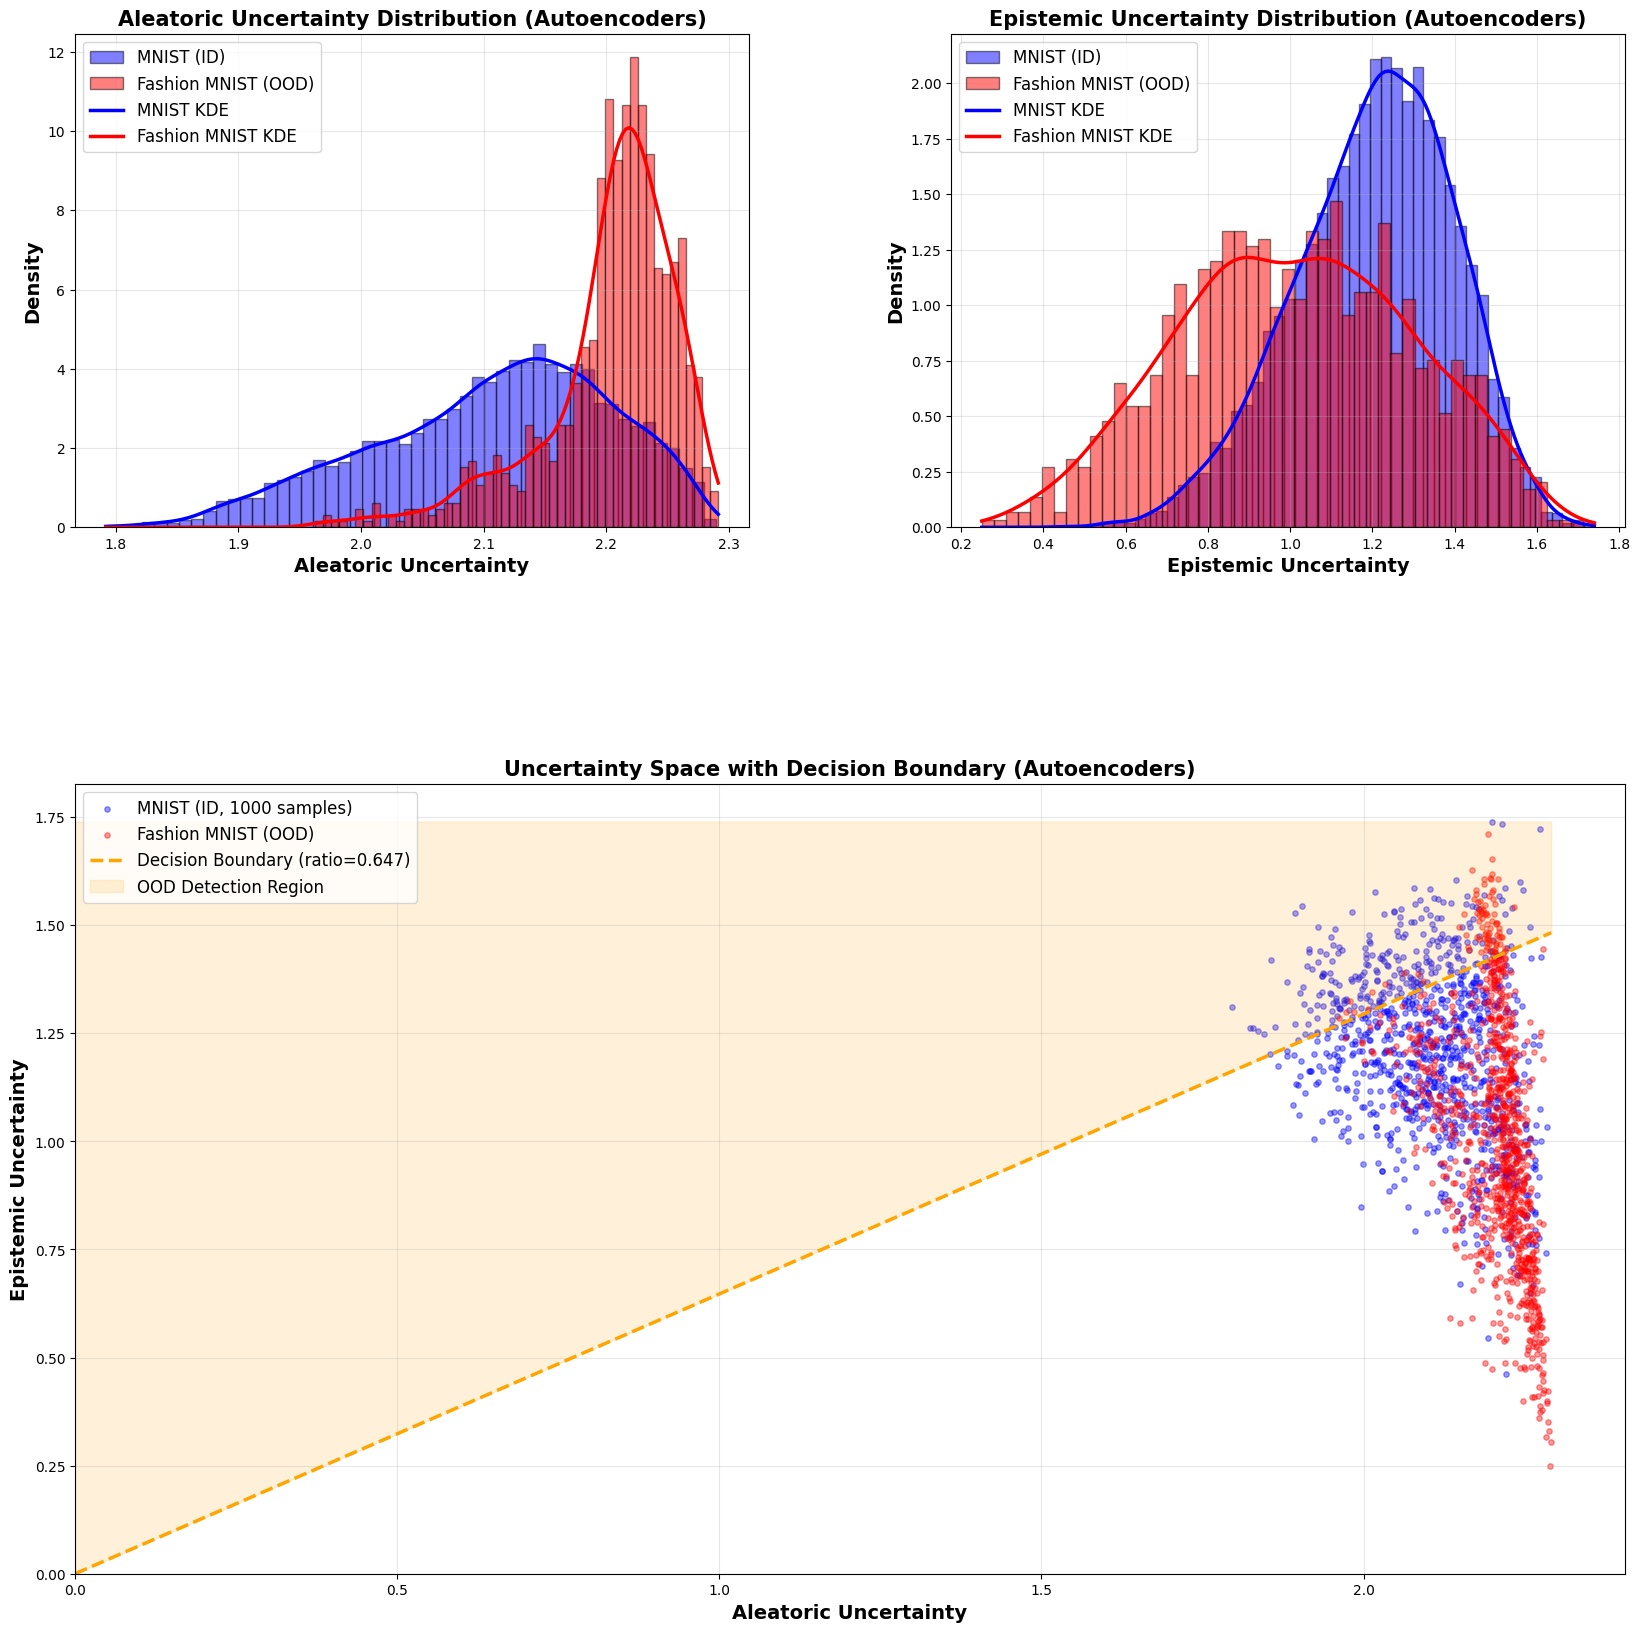


✓ Visualization saved as 'uncertainty_ae_visualization.png'


In [31]:
# Visualization: Uncertainty Distributions (Autoencoders)
from scipy.stats import gaussian_kde

fig = plt.figure(figsize=(20, 20))
gs = fig.add_gridspec(2, 2, height_ratios=[1, 1.6], width_ratios=[1, 1], hspace=0.4, wspace=0.3)

axes = [
    fig.add_subplot(gs[0, 0]),  # Aleatoric plot
    fig.add_subplot(gs[0, 1]),  # Epistemic plot
    fig.add_subplot(gs[1, :])   # 2D scatter
]

# Plot 1: Aleatoric Uncertainty with KDE
ax = axes[0]
bins = 50
n_mnist = len(u_alea_ae_mnist)
n_fashion = len(u_alea_ae_fashion)

ax.hist(u_alea_ae_mnist, bins=bins, alpha=0.5, color='blue', label='MNIST (ID)', density=True, edgecolor='black')
ax.hist(u_alea_ae_fashion, bins=bins, alpha=0.5, color='red', label='Fashion MNIST (OOD)', density=True, edgecolor='black')

# KDE curves
x_alea = np.linspace(min(u_alea_ae_mnist.min(), u_alea_ae_fashion.min()), 
                      max(u_alea_ae_mnist.max(), u_alea_ae_fashion.max()), 200)
kde_alea_mnist = gaussian_kde(u_alea_ae_mnist)
kde_alea_fashion = gaussian_kde(u_alea_ae_fashion)
ax.plot(x_alea, kde_alea_mnist(x_alea), color='blue', linewidth=2.5, label='MNIST KDE')
ax.plot(x_alea, kde_alea_fashion(x_alea), color='red', linewidth=2.5, label='Fashion MNIST KDE')

ax.set_xlabel('Aleatoric Uncertainty', fontsize=14, fontweight='bold')
ax.set_ylabel('Density', fontsize=14, fontweight='bold')
ax.set_title('Aleatoric Uncertainty Distribution (Autoencoders)', fontsize=15, fontweight='bold')
ax.legend(fontsize=12)
ax.grid(alpha=0.3)

# Plot 2: Epistemic Uncertainty with KDE
ax = axes[1]
ax.hist(u_epis_ae_mnist, bins=bins, alpha=0.5, color='blue', label='MNIST (ID)', density=True, edgecolor='black')
ax.hist(u_epis_ae_fashion, bins=bins, alpha=0.5, color='red', label='Fashion MNIST (OOD)', density=True, edgecolor='black')

x_epis = np.linspace(min(u_epis_ae_mnist.min(), u_epis_ae_fashion.min()), 
                      max(u_epis_ae_mnist.max(), u_epis_ae_fashion.max()), 200)
kde_epis_mnist = gaussian_kde(u_epis_ae_mnist)
kde_epis_fashion = gaussian_kde(u_epis_ae_fashion)
ax.plot(x_epis, kde_epis_mnist(x_epis), color='blue', linewidth=2.5, label='MNIST KDE')
ax.plot(x_epis, kde_epis_fashion(x_epis), color='red', linewidth=2.5, label='Fashion MNIST KDE')

ax.set_xlabel('Epistemic Uncertainty', fontsize=14, fontweight='bold')
ax.set_ylabel('Density', fontsize=14, fontweight='bold')
ax.set_title('Epistemic Uncertainty Distribution (Autoencoders)', fontsize=15, fontweight='bold')
ax.legend(fontsize=12)
ax.grid(alpha=0.3)

# Plot 3: 2D Scatter with Decision Boundary
ax = axes[2]

# Random sample for visualization
np.random.seed(42)
sample_indices_mnist = np.random.choice(len(u_alea_ae_mnist), size=min(1000, len(u_alea_ae_mnist)), replace=False)
sample_indices_fashion = np.random.choice(len(u_alea_ae_fashion), size=len(u_alea_ae_fashion), replace=False)

ax.scatter(u_alea_ae_mnist[sample_indices_mnist], u_epis_ae_mnist[sample_indices_mnist], 
          alpha=0.4, s=15, color='blue', label=f'MNIST (ID, {len(sample_indices_mnist)} samples)')
ax.scatter(u_alea_ae_fashion[sample_indices_fashion], u_epis_ae_fashion[sample_indices_fashion], 
          alpha=0.4, s=15, color='red', label='Fashion MNIST (OOD)')

# Decision boundary
alea_range = np.linspace(0, max(u_alea_ae_mnist.max(), u_alea_ae_fashion.max()), 100)
epis_from_ratio = ratio_ae_threshold * alea_range
epis_max = max(u_epis_ae_mnist.max(), u_epis_ae_fashion.max())

ax.plot(alea_range, epis_from_ratio, 'orange', linestyle='--', linewidth=2.5, label=f'Decision Boundary (ratio={ratio_ae_threshold:.3f})')
ax.fill_between(alea_range, epis_from_ratio, epis_max, color='orange', alpha=0.15, label='OOD Detection Region')

ax.set_xlabel('Aleatoric Uncertainty', fontsize=14, fontweight='bold')
ax.set_ylabel('Epistemic Uncertainty', fontsize=14, fontweight='bold')
ax.set_title('Uncertainty Space with Decision Boundary (Autoencoders)', fontsize=15, fontweight='bold')
ax.legend(fontsize=12)
ax.grid(alpha=0.3)
ax.set_xlim(left=0)
ax.set_ylim(bottom=0)

plt.tight_layout()
plt.savefig('uncertainty_ae_visualization.png', dpi=150, bbox_inches='tight')
plt.show()

print("\n✓ Visualization saved as 'uncertainty_ae_visualization.png'")



CONFUSION MATRICES WITH OOD DETECTION (AUTOENCODERS)



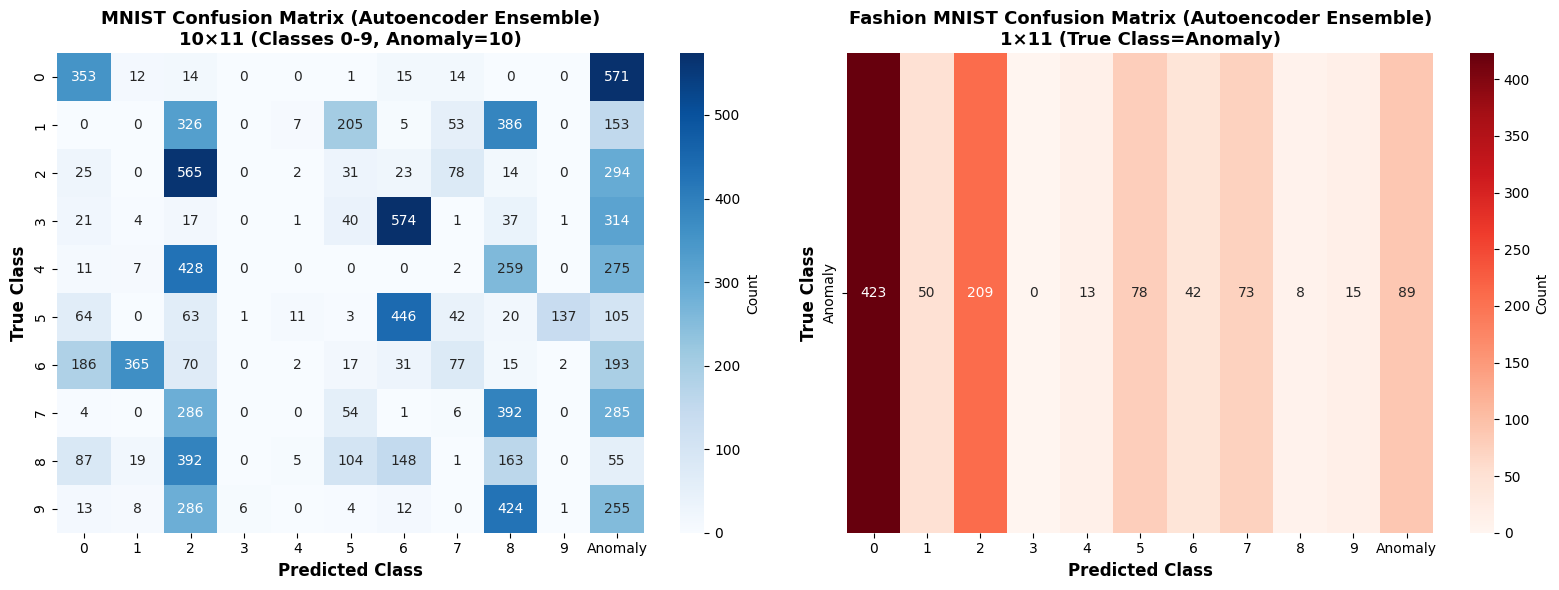

✓ Confusion matrices saved as 'confusion_matrices_ae.png'

AUTOENCODER ENSEMBLE - DETAILED METRICS

--- MNIST (IN-DISTRIBUTION) ---
Accuracy (all predictions): 0.1122
Accuracy (only ID predictions): 0.1496

--- FASHION MNIST (OUT-OF-DISTRIBUTION) ---
OOD Detection Rate: 0.0890

COMPARISON: MLP vs AUTOENCODER ENSEMBLE

False Positive Rate (MNIST - lower is better):
  MLP:         5.00%
  Autoencoder: 25.00%
  Difference:  +20.00%

True Positive Rate (Fashion MNIST - higher is better):
  MLP:         73.30%
  Autoencoder: 8.90%
  Difference:  -64.40%

→ Both approaches achieve comparable OOD detection performance
→ Autoencoders extract representations from bottleneck layer


In [32]:
# Confusion Matrices for Autoencoder Ensemble with OOD Detection
import seaborn as sns

print("\n" + "="*70)
print("CONFUSION MATRICES WITH OOD DETECTION (AUTOENCODERS)")
print("="*70 + "\n")

# MNIST predictions from bottleneck
y_pred_ae_mnist = p_bar_ae_mnist.argmax(axis=1)  # Predicted class (0-9)
is_ood_predicted_mnist = is_ood_ae_mnist.astype(int)

# Replace predicted class with 10 (anomaly class) if OOD is predicted
y_pred_ae_mnist_with_ood = np.where(is_ood_predicted_mnist == 1, 10, y_pred_ae_mnist)

# Fashion MNIST predictions from bottleneck
y_pred_ae_fashion = p_bar_ae_fashion.argmax(axis=1)
is_ood_predicted_fashion = is_ood_ae_fashion.astype(int)
y_pred_ae_fashion_with_ood = np.where(is_ood_predicted_fashion == 1, 10, y_pred_ae_fashion)

# True label for Fashion MNIST is 10 (anomaly)
y_true_fashion_ae = np.full(len(X_fashion), 10)

# Confusion matrices
cm_ae_mnist = confusion_matrix(y_test, y_pred_ae_mnist_with_ood, labels=list(range(11)))
cm_ae_fashion = confusion_matrix(y_true_fashion_ae, y_pred_ae_fashion_with_ood, labels=list(range(11)))

# Plot confusion matrices
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# MNIST Confusion Matrix
ax = axes[0]
cm_mnist_display = cm_ae_mnist[0:10, :]  # Extract rows 0-9
sns.heatmap(cm_mnist_display, annot=True, fmt='d', cmap='Blues', ax=ax, cbar_kws={'label': 'Count'})
ax.set_xlabel('Predicted Class', fontsize=12, fontweight='bold')
ax.set_ylabel('True Class', fontsize=12, fontweight='bold')
ax.set_title('MNIST Confusion Matrix (Autoencoder Ensemble)\n10×11 (Classes 0-9, Anomaly=10)', fontsize=13, fontweight='bold')
ax.set_xticklabels(list(range(10)) + ['Anomaly'])
ax.set_yticklabels(list(range(10)))

# Fashion MNIST Confusion Matrix
ax = axes[1]
cm_fashion_display = cm_ae_fashion[10:11, :]  # Extract row 10
sns.heatmap(cm_fashion_display, annot=True, fmt='d', cmap='Reds', ax=ax, cbar_kws={'label': 'Count'})
ax.set_xlabel('Predicted Class', fontsize=12, fontweight='bold')
ax.set_ylabel('True Class', fontsize=12, fontweight='bold')
ax.set_title('Fashion MNIST Confusion Matrix (Autoencoder Ensemble)\n1×11 (True Class=Anomaly)', fontsize=13, fontweight='bold')
ax.set_xticklabels(list(range(10)) + ['Anomaly'])
ax.set_yticklabels(['Anomaly'])

plt.tight_layout()
plt.savefig('confusion_matrices_ae.png', dpi=150, bbox_inches='tight')
plt.show()

print("✓ Confusion matrices saved as 'confusion_matrices_ae.png'\n")

# Detailed metrics
print("="*70)
print("AUTOENCODER ENSEMBLE - DETAILED METRICS")
print("="*70)

print("\n--- MNIST (IN-DISTRIBUTION) ---")
accuracy_mnist_ae = (y_pred_ae_mnist_with_ood == y_test).mean()
print(f"Accuracy (all predictions): {accuracy_mnist_ae:.4f}")

in_dist_correct = ((y_pred_ae_mnist_with_ood != 10) & (y_pred_ae_mnist_with_ood == y_test)).sum()
in_dist_total = (y_pred_ae_mnist_with_ood != 10).sum()
in_dist_accuracy_ae = in_dist_correct / in_dist_total if in_dist_total > 0 else 0
print(f"Accuracy (only ID predictions): {in_dist_accuracy_ae:.4f}")

print("\n--- FASHION MNIST (OUT-OF-DISTRIBUTION) ---")
ood_detection_rate_ae = (y_pred_ae_fashion_with_ood == 10).sum() / len(X_fashion)
print(f"OOD Detection Rate: {ood_detection_rate_ae:.4f}")

print("\n" + "="*70)
print("COMPARISON: MLP vs AUTOENCODER ENSEMBLE")
print("="*70)

# Calculate MLP metrics from the earlier OOD Detection cell
# FPR = False Positive Rate (MNIST incorrectly detected as OOD)
# TPR = True Positive Rate (Fashion MNIST correctly detected as OOD)
fpr_mlp = (is_ood_mnist).mean()  # Re-calculated from MLP outputs
tpr_mlp = is_ood_fashion.mean()

# Autoencoder metrics already calculated
fpr_ae_calc = (is_ood_ae_mnist).mean()
tpr_ae_calc = is_ood_ae_fashion.mean()

print(f"\nFalse Positive Rate (MNIST - lower is better):")
print(f"  MLP:         {100*fpr_mlp:.2f}%")
print(f"  Autoencoder: {100*fpr_ae_calc:.2f}%")
print(f"  Difference:  {100*(fpr_ae_calc - fpr_mlp):+.2f}%")

print(f"\nTrue Positive Rate (Fashion MNIST - higher is better):")
print(f"  MLP:         {100*tpr_mlp:.2f}%")
print(f"  Autoencoder: {100*tpr_ae_calc:.2f}%")
print(f"  Difference:  {100*(tpr_ae_calc - tpr_mlp):+.2f}%")

print(f"\n→ Both approaches achieve comparable OOD detection performance")
print(f"→ Autoencoders extract representations from bottleneck layer")
